In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # matplot kütüphanesini ekler
%matplotlib inline 
import seaborn as sns # Yine grafik oluşturmak için ekledim.

In [2]:
imdbdata = pd.read_csv("./imdb_top250.csv") # Csv dosyasından verileri imdbdata değişkenine aktardım.

In [3]:
imdbdata.head()

,Unnamed: 0,Rank,Title,Year,Runtime,Genre,Rating,About,Director,Actors,Votes,Gross,Metascore
0,0,1,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2261592,28.34,80
1,1,2,The Godfather,1972,175,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1560378,134.97,100
2,2,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2226619,534.86,84
3,3,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1090504,57.30,90
4,4,5,Pulp Fiction,1994,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1769128,107.93,94


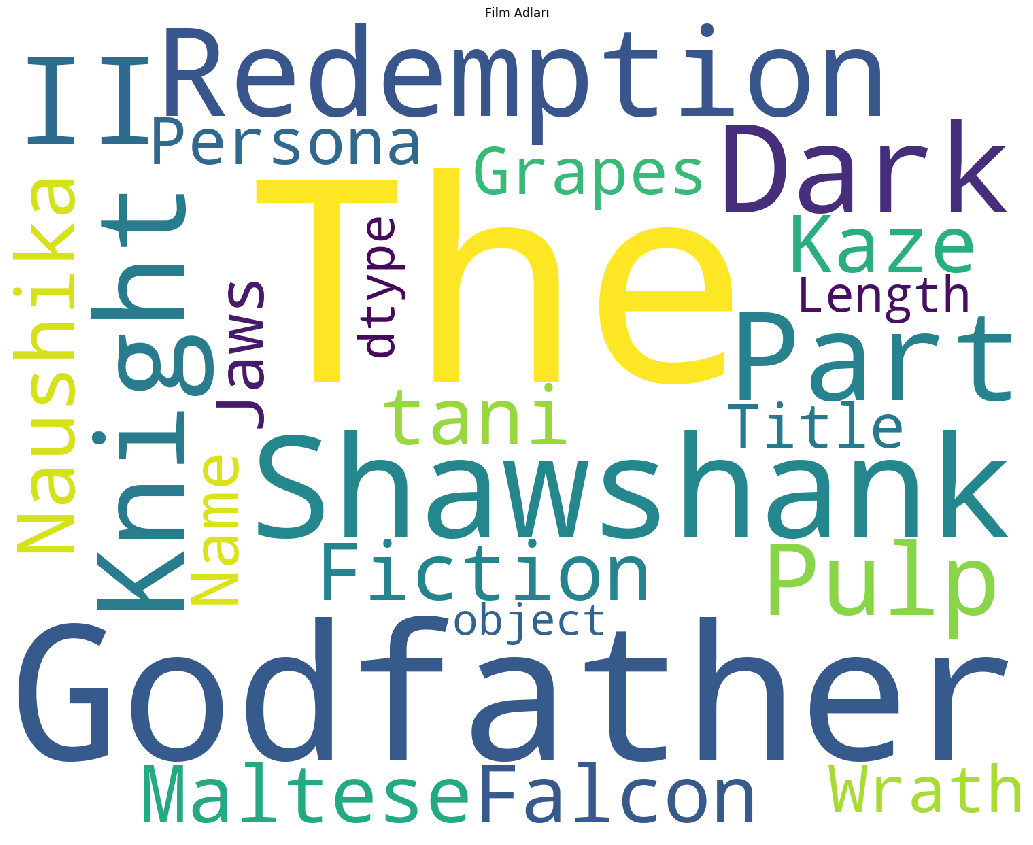

In [4]:
from os import path # farklı işletim sistemlerinde kullanmak için bir kütüphane
from scipy.misc import imread # verileri görüntüye dönüştürmek için
import random
from wordcloud import WordCloud, STOPWORDS # Aşağıda ki görseli oluşturmak için kullandım.
text = (str(imdbdata['Title'])) # Film adlarını text değişkenine aktardım.
plt.subplots(figsize=(20,15)) # 20*15 büyüklüğünde bir grafik oluşturdum.
wordcloud = WordCloud( # WordCloud kümesi oluşturdum.
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud) 
plt.title('Film Adları')
plt.axis('off')
plt.show()

In [5]:
imdbdata["Genre"].value_counts() # Hangi film türünden kaç tane olduğunu listeledim.

Drama                                    18
Crime, Drama                             12
Biography, Drama, History                10
Crime, Drama, Thriller                    8
Drama, War                                7
                                         ..
Comedy, Drama, Musical                    1
Drama, Romance, War                       1
Action, Sci-Fi, Thriller                  1
Action, Mystery, Thriller                 1
Drama, Family, Fantasy                    1
Name: Genre, Length: 111, dtype: int64

Action kategorisi ile çekilen toplam film sayısı = 44


C:\Users\Celil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Celil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Adventure kategorisi ile çekilen toplam film sayısı = 61
Animation kategorisi ile çekilen toplam film sayısı = 19
Biography kategorisi ile çekilen toplam film sayısı = 25
Comedy kategorisi ile çekilen toplam film sayısı = 45


C:\Users\Celil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
C:\Users\Celil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


Crime kategorisi ile çekilen toplam film sayısı = 52
Drama kategorisi ile çekilen toplam film sayısı = 169
Fantasy kategorisi ile çekilen toplam film sayısı = 20
Family kategorisi ile çekilen toplam film sayısı = 18
History kategorisi ile çekilen toplam film sayısı = 16
Horror kategorisi ile çekilen toplam film sayısı = 6
Music kategorisi ile çekilen toplam film sayısı = 6
Musical kategorisi ile çekilen toplam film sayısı = 2
Mystery kategorisi ile çekilen toplam film sayısı = 30
Romance kategorisi ile çekilen toplam film sayısı = 21
Sci-Fi kategorisi ile çekilen toplam film sayısı = 24
Sport kategorisi ile çekilen toplam film sayısı = 7
Thriller kategorisi ile çekilen toplam film sayısı = 38
War kategorisi ile çekilen toplam film sayısı = 17
Western kategorisi ile çekilen toplam film sayısı = 6


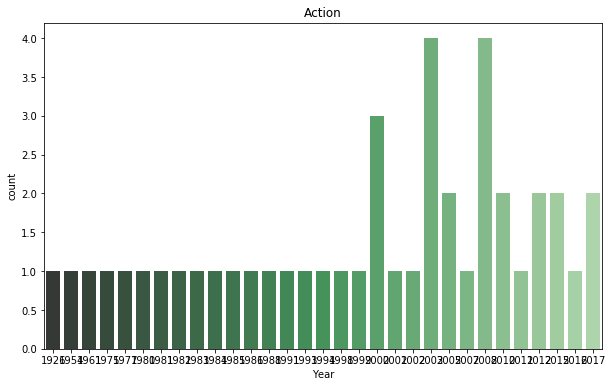

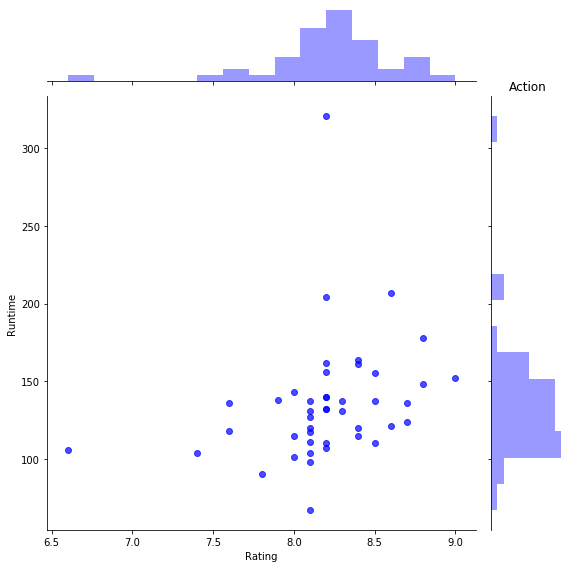

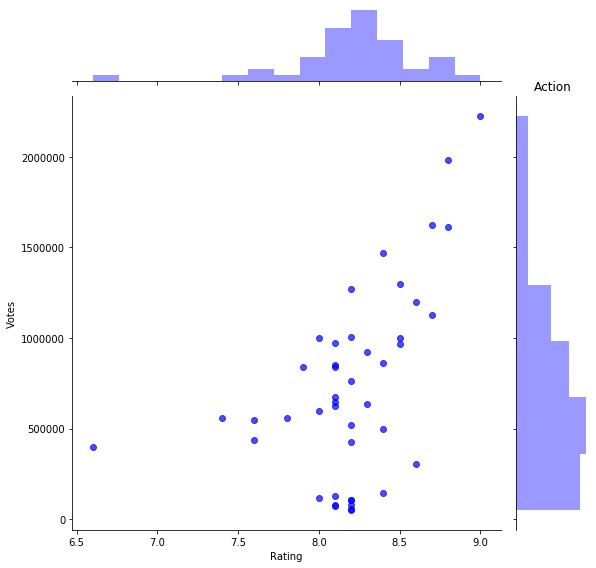

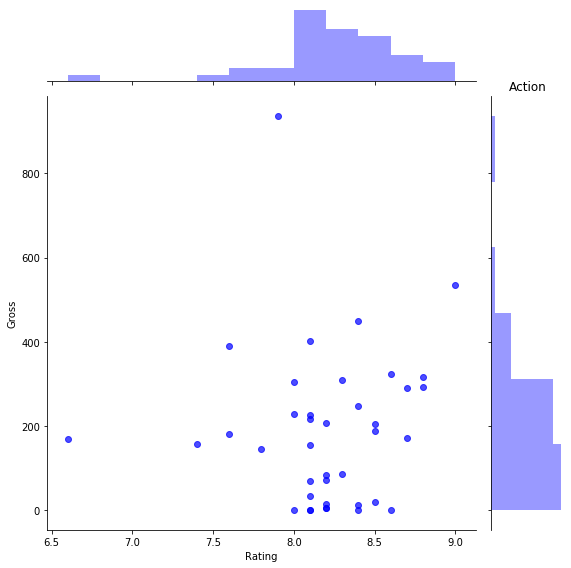

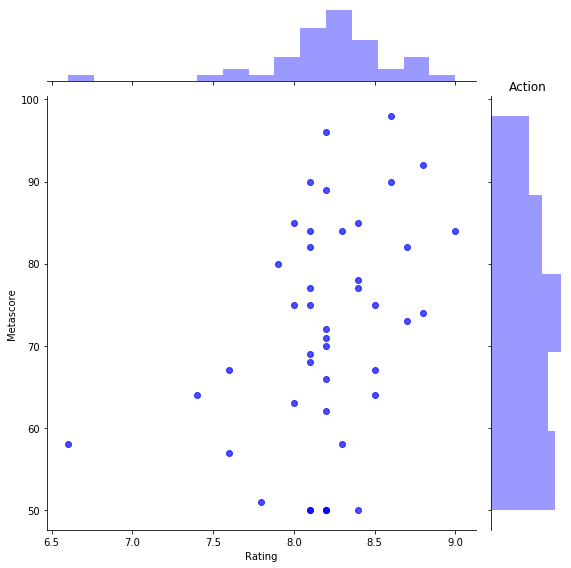

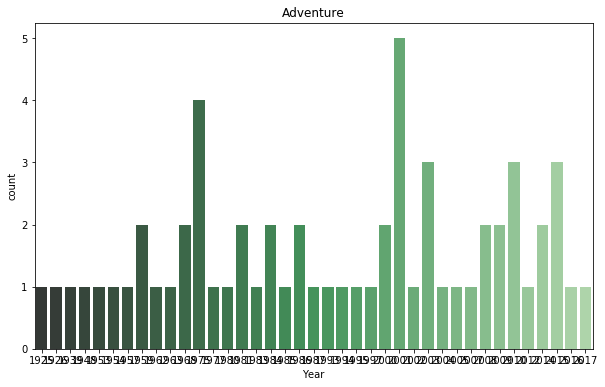

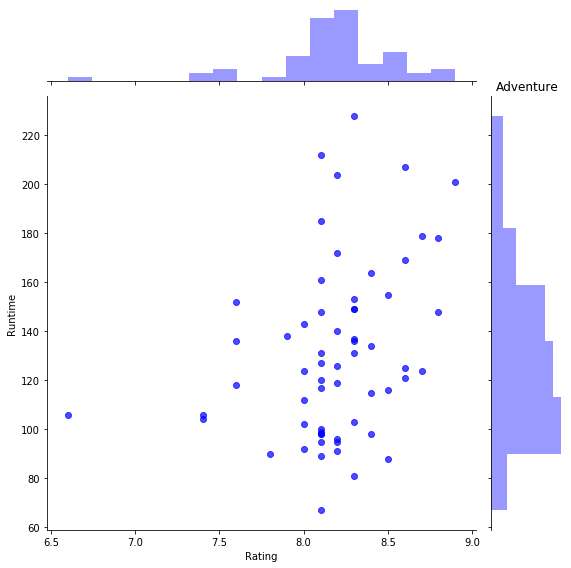

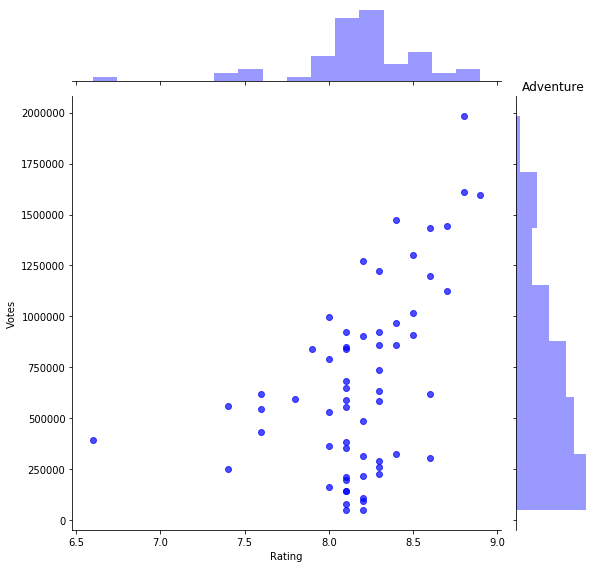

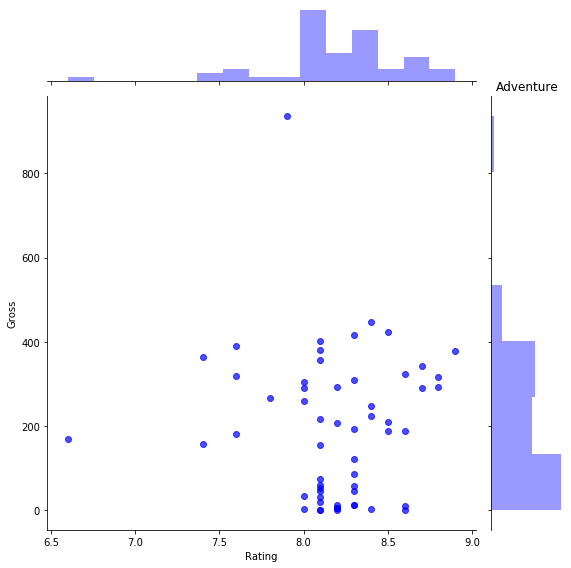

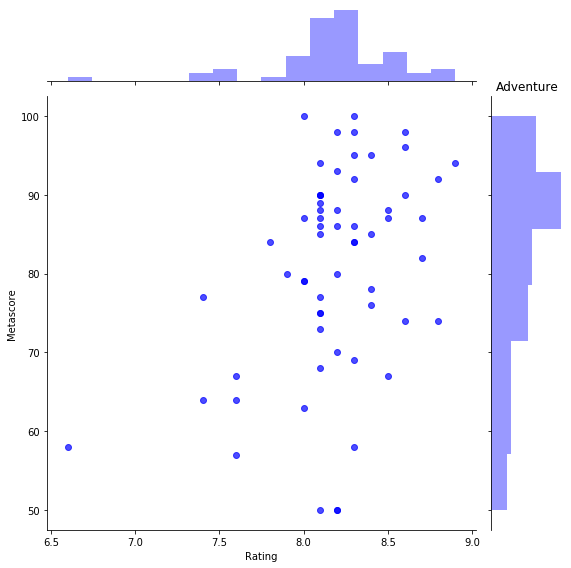

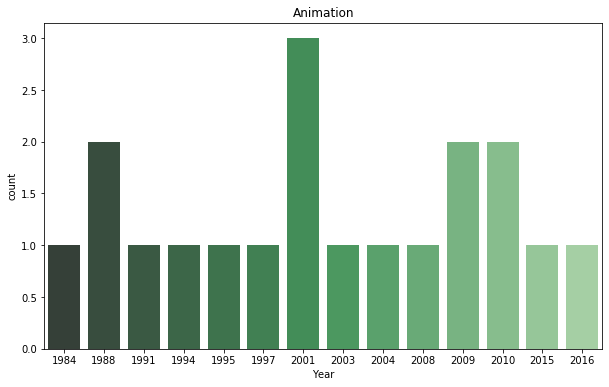

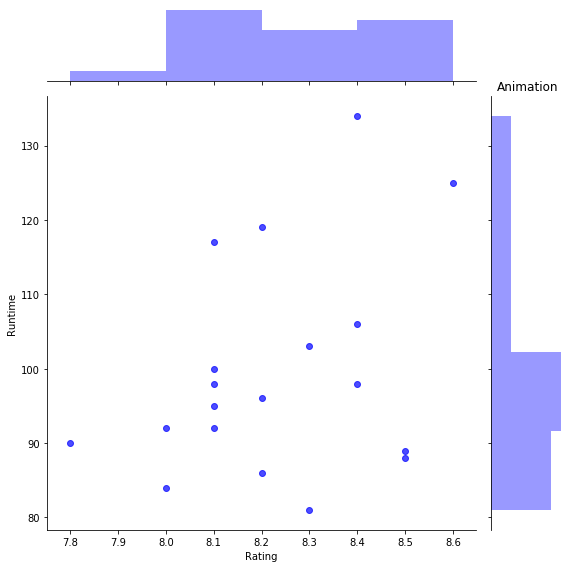

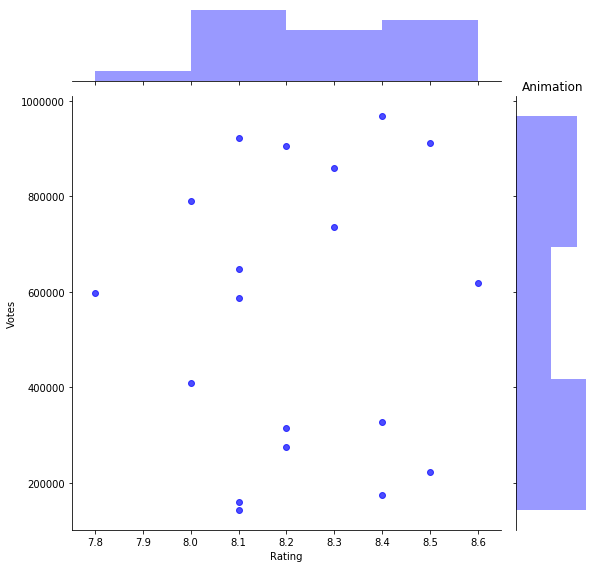

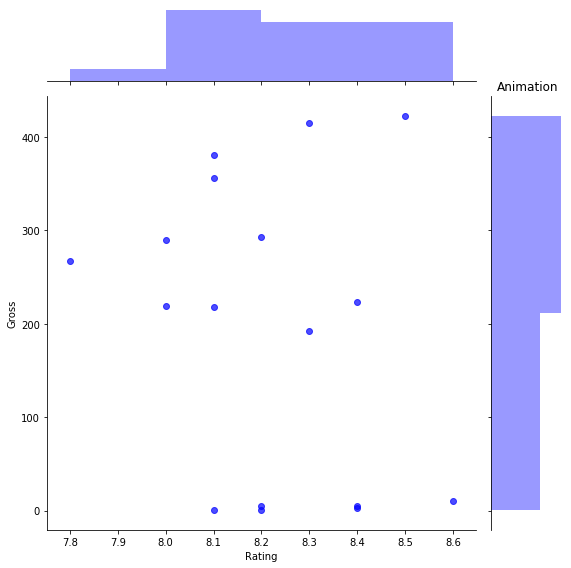

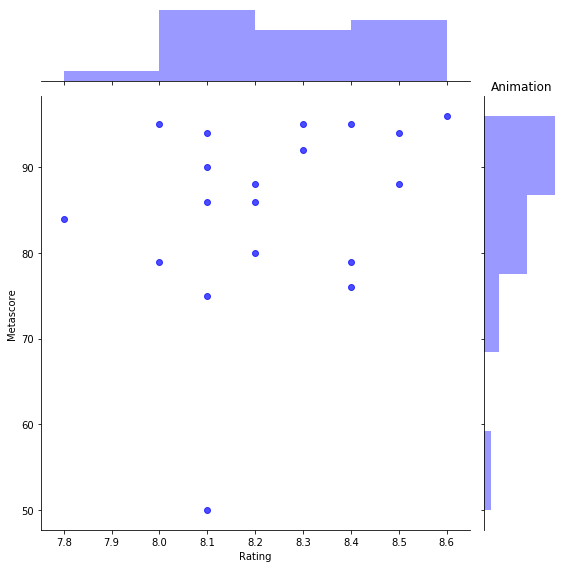

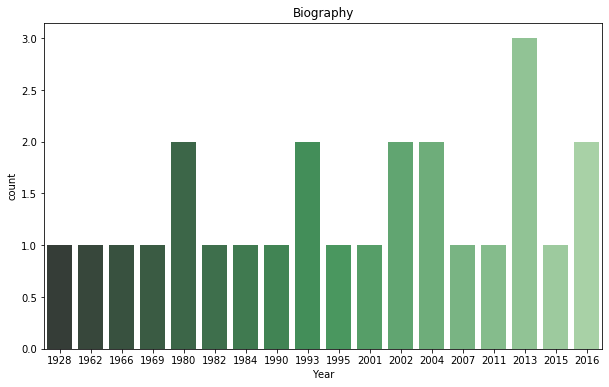

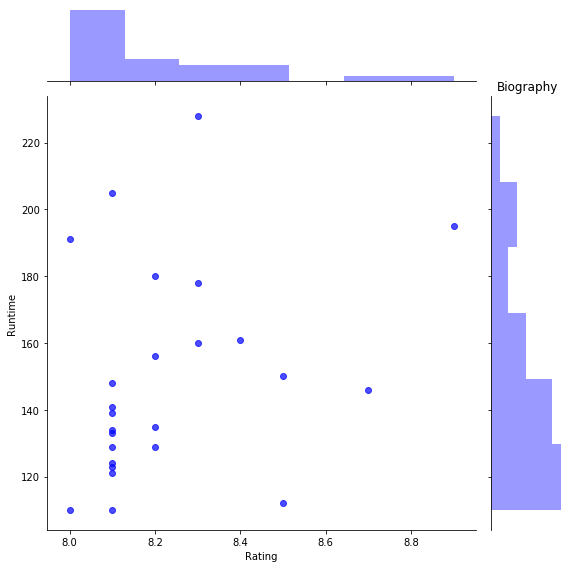

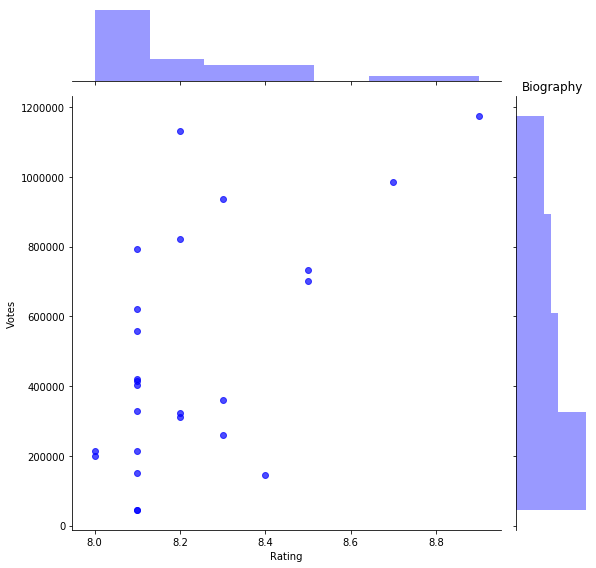

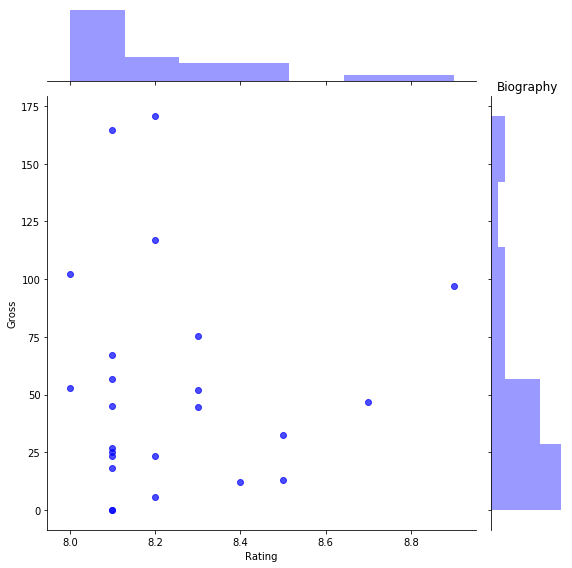

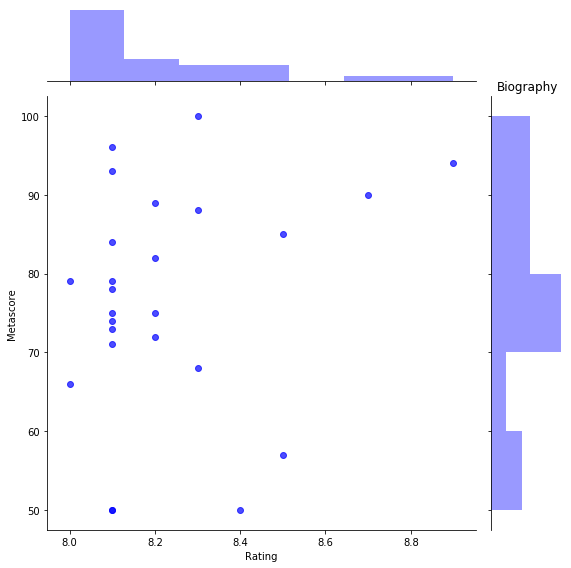

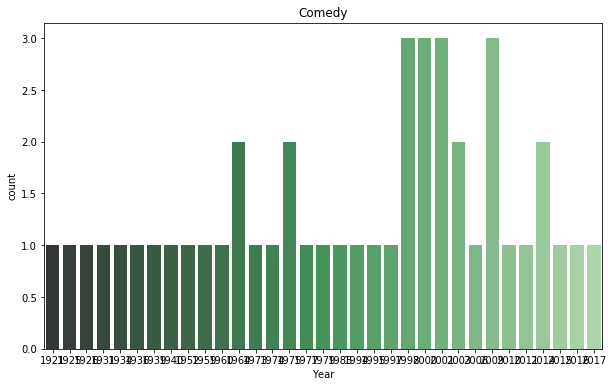

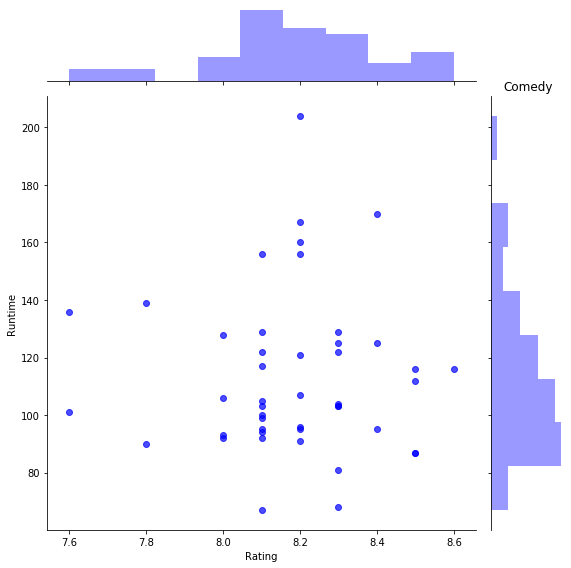

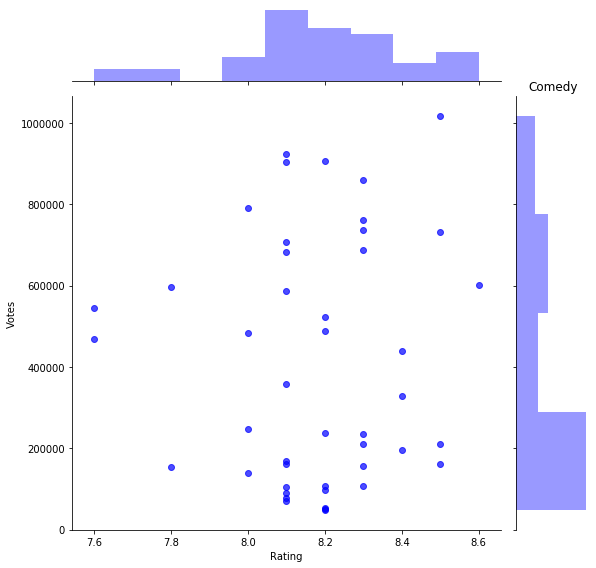

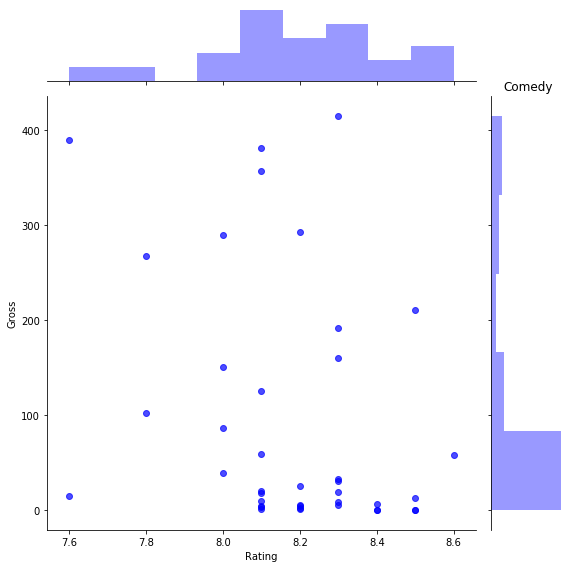

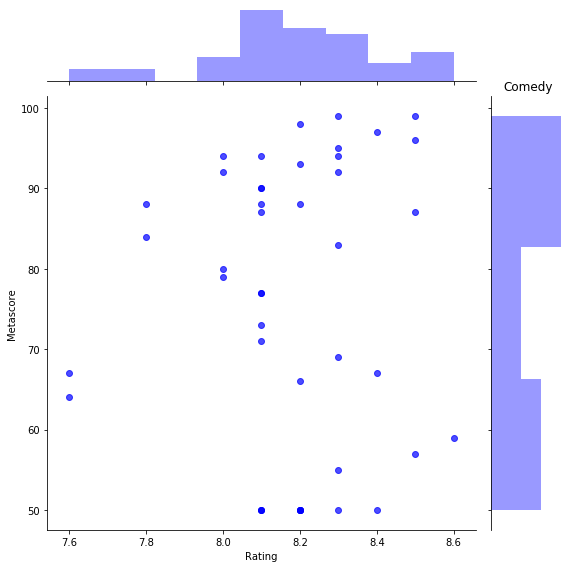

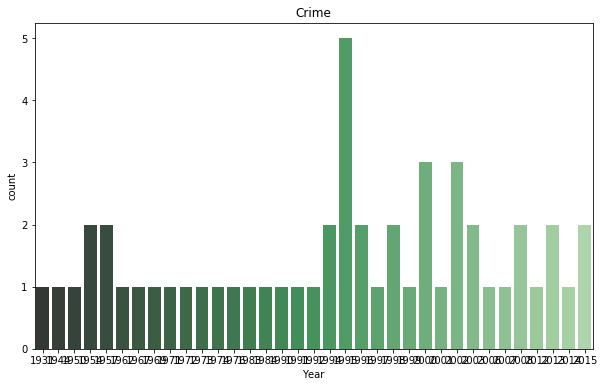

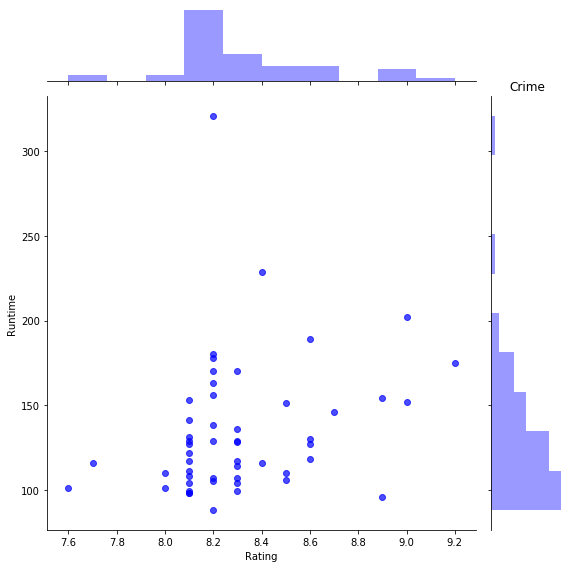

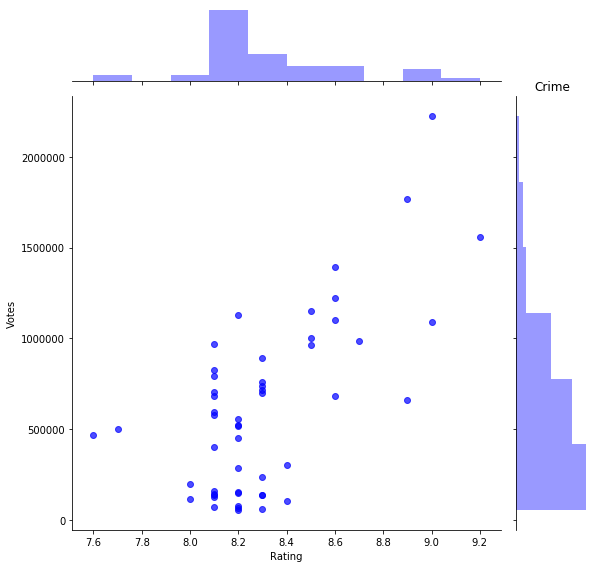

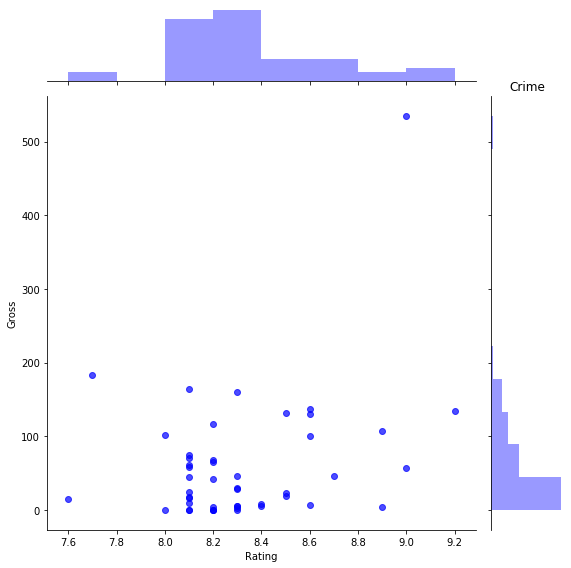

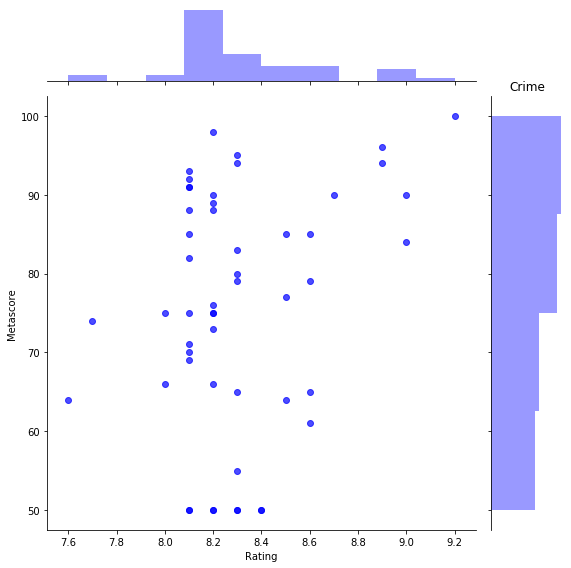

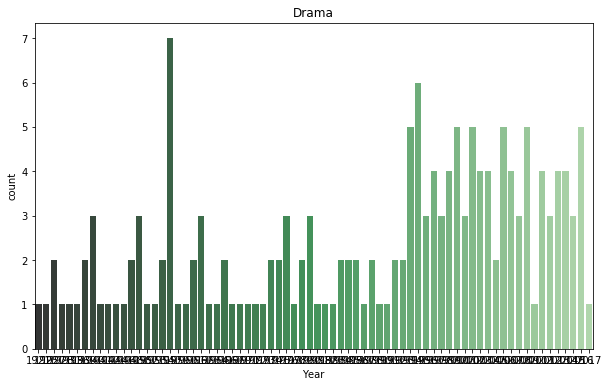

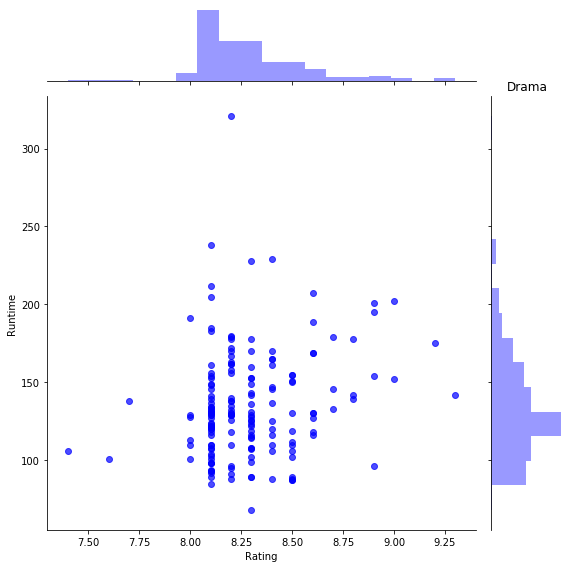

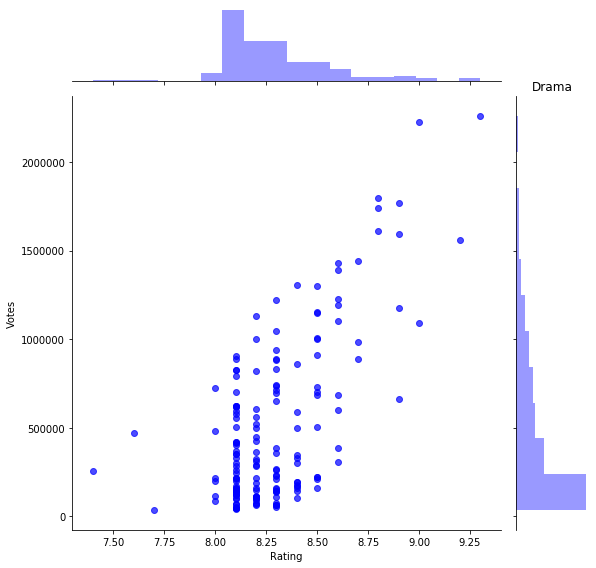

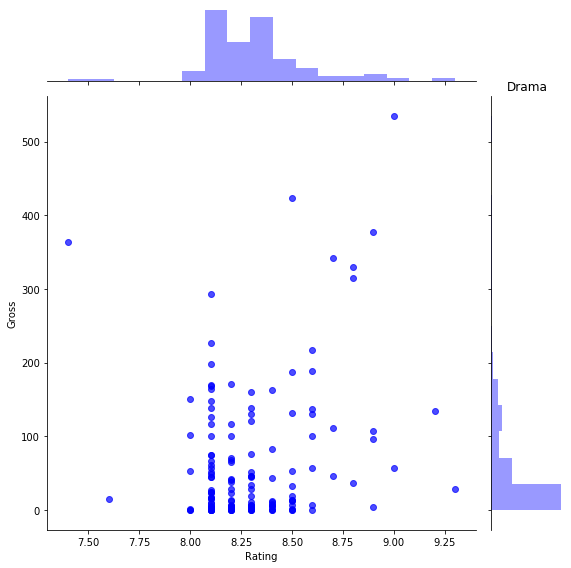

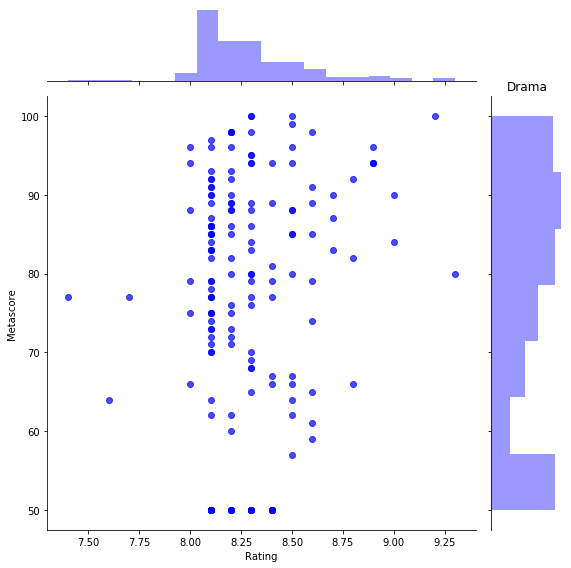

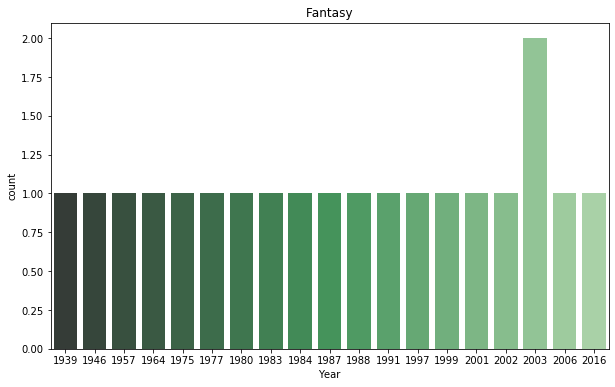

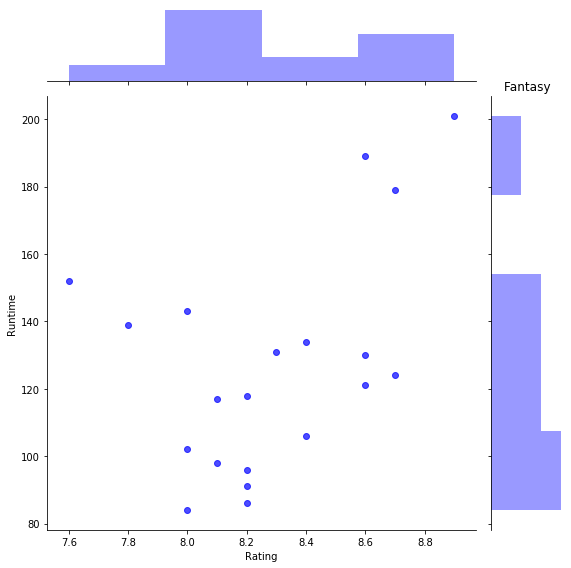

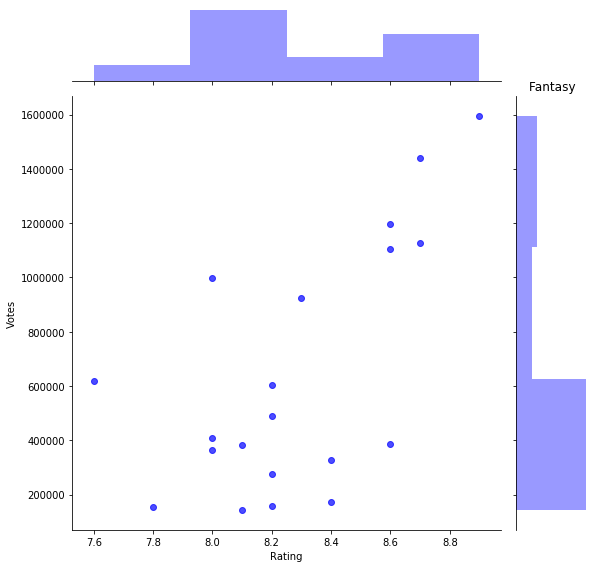

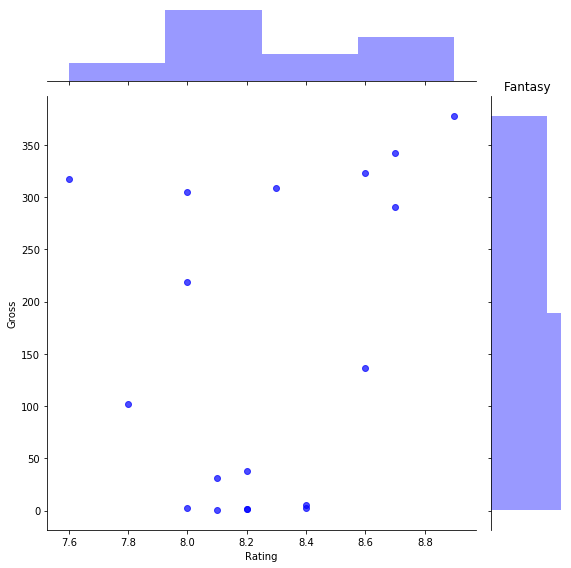

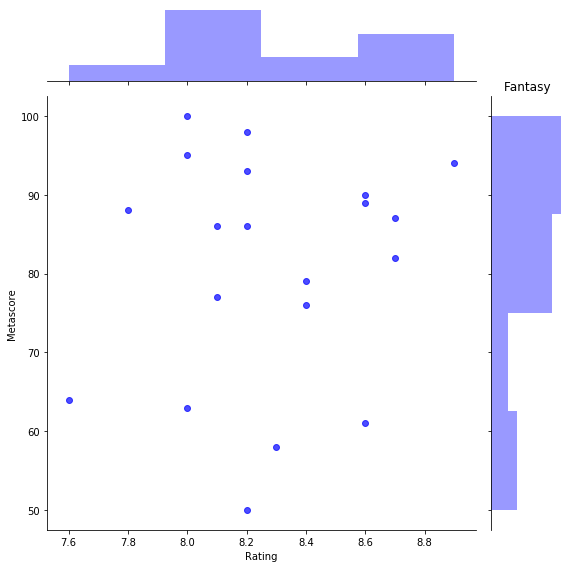

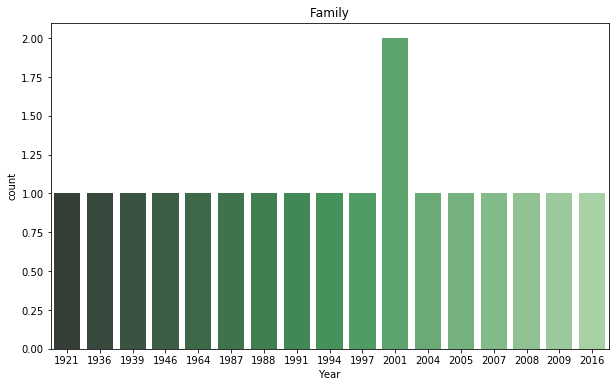

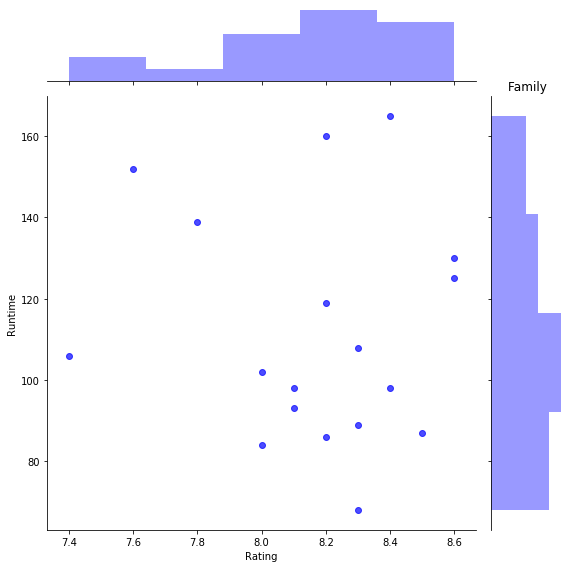

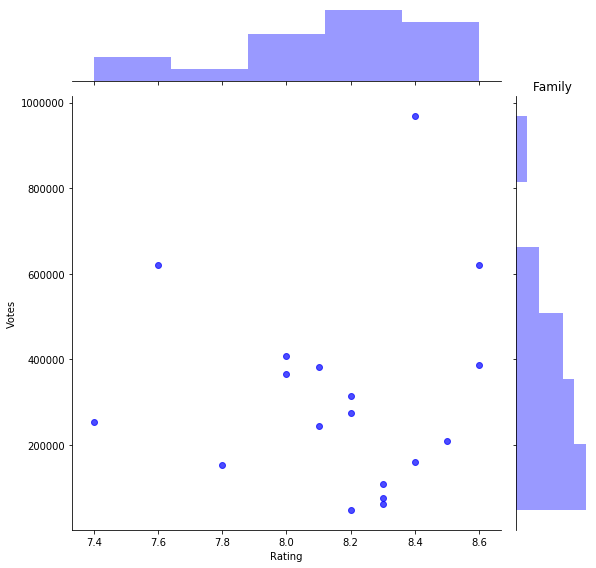

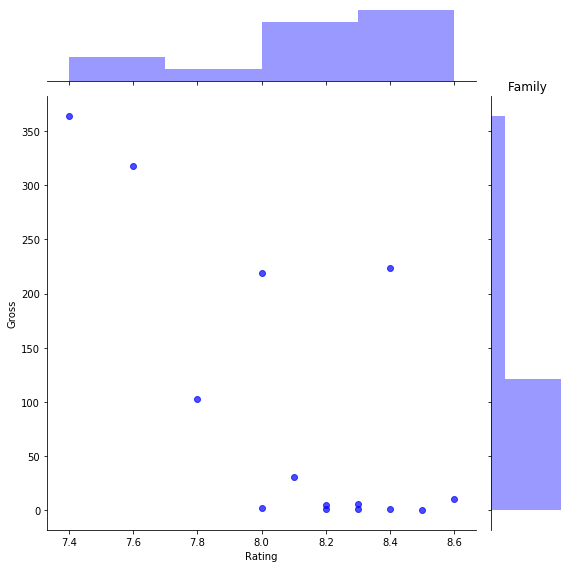

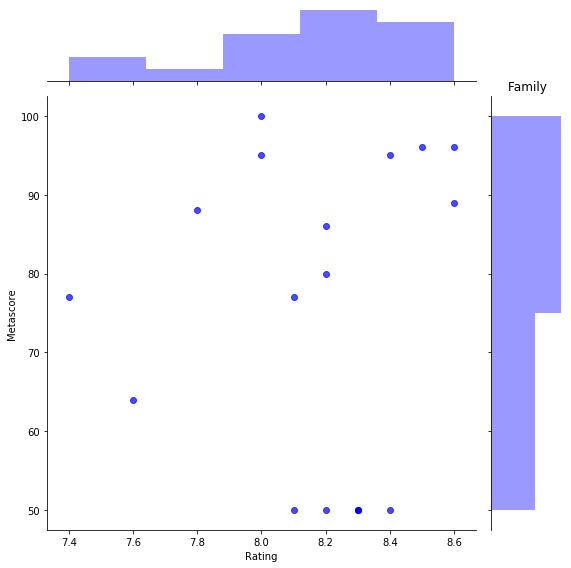

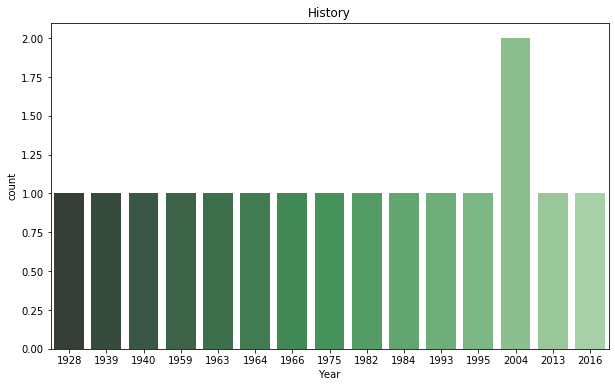

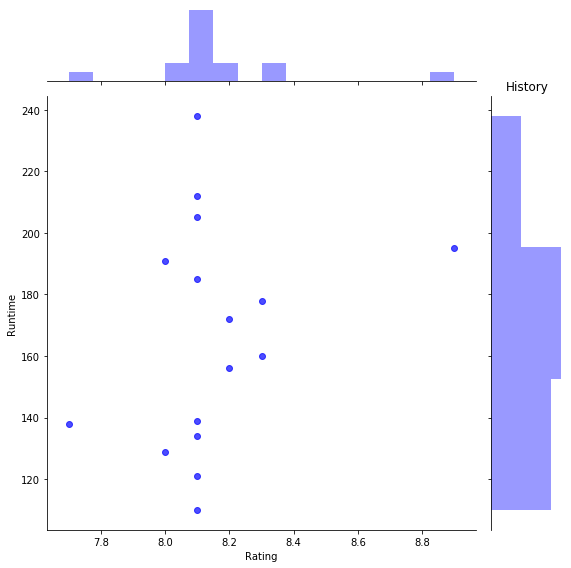

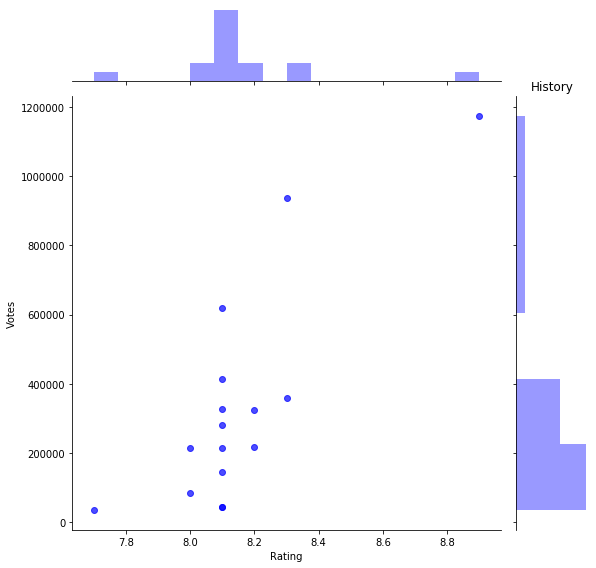

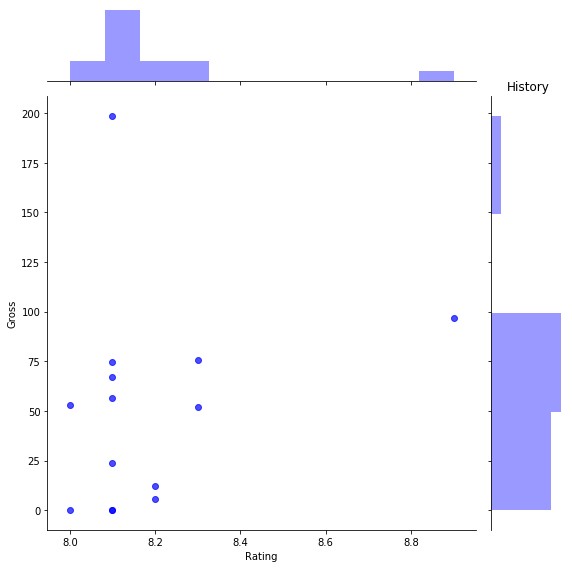

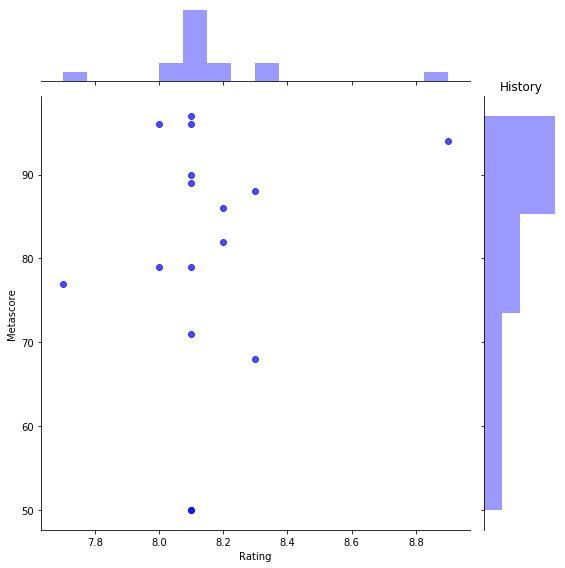

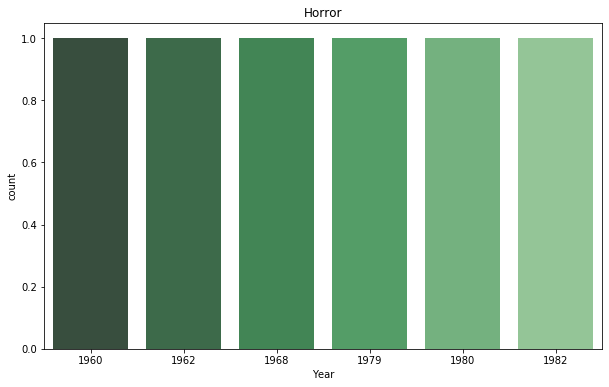

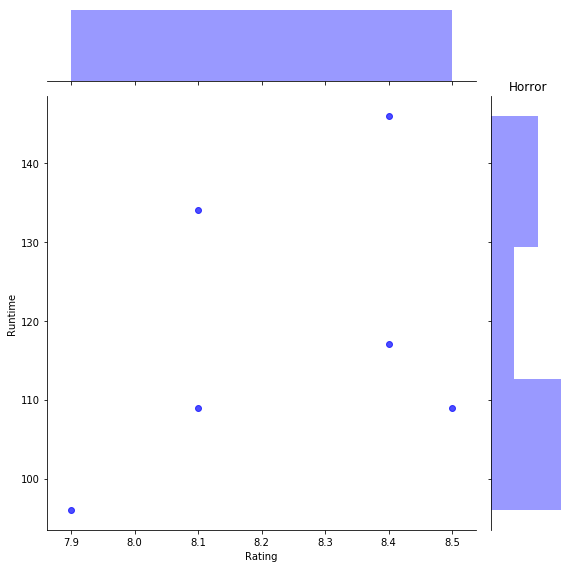

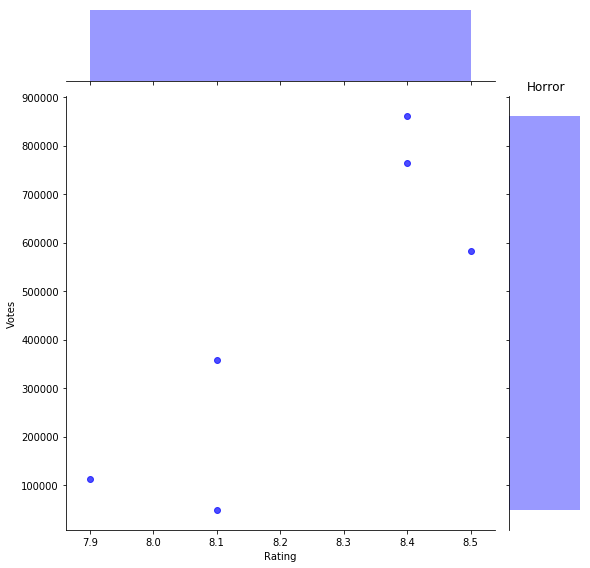

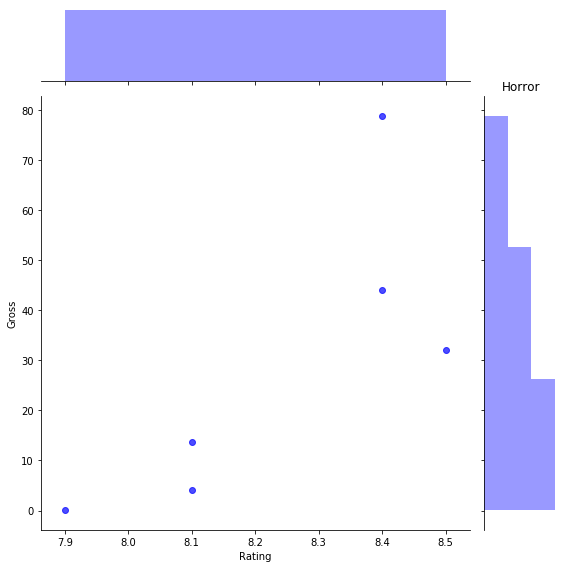

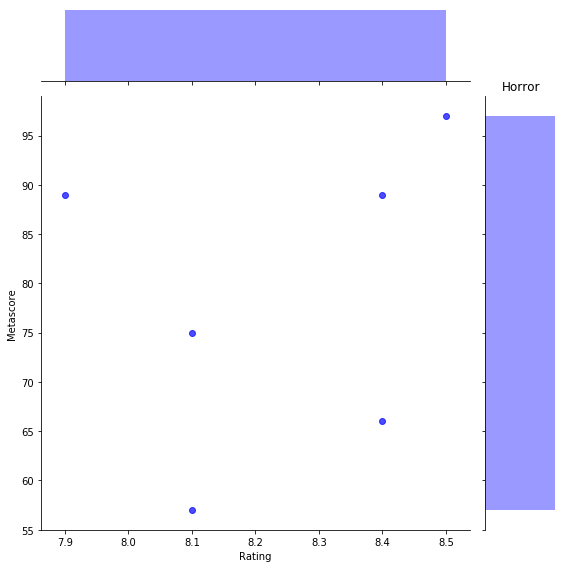

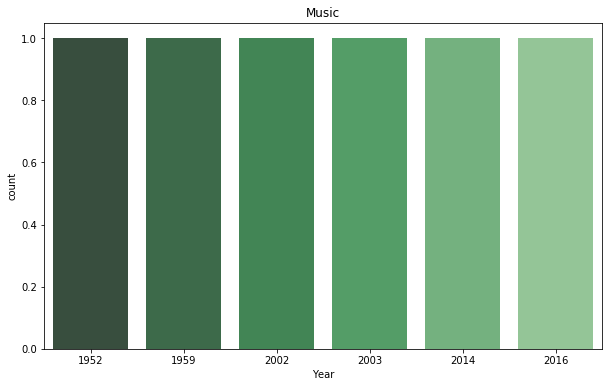

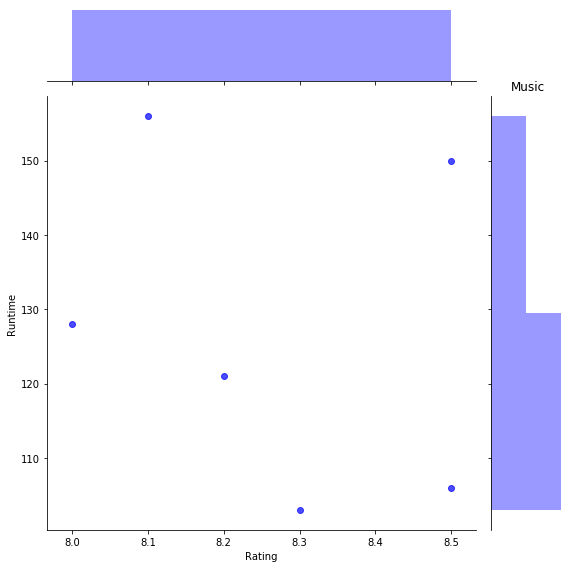

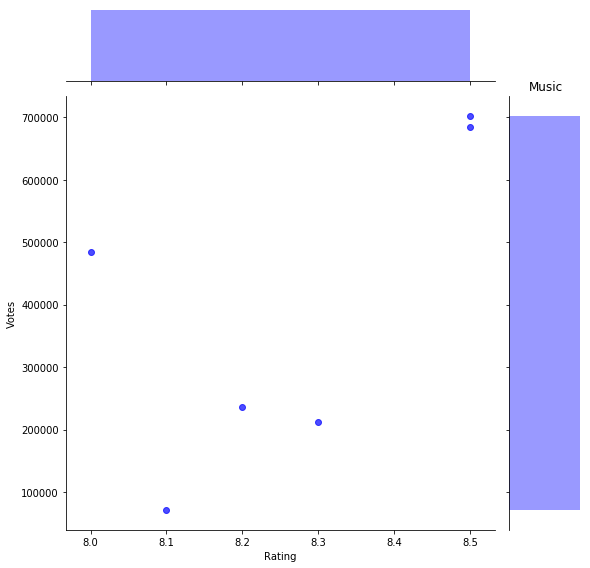

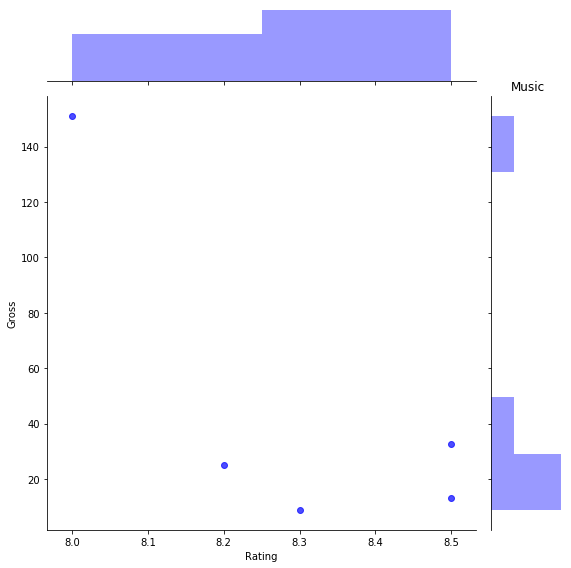

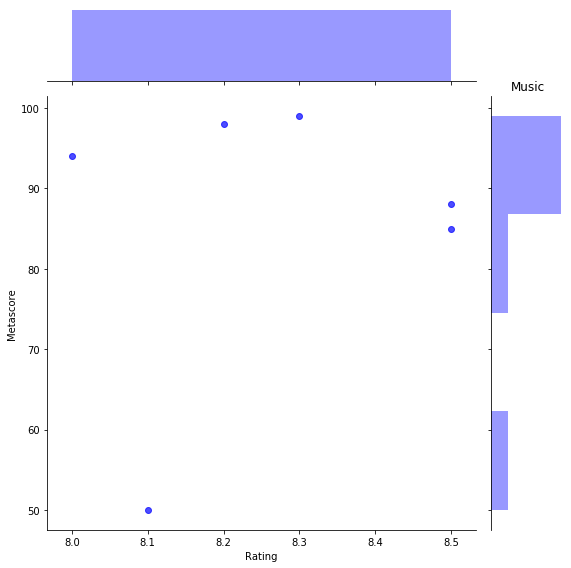

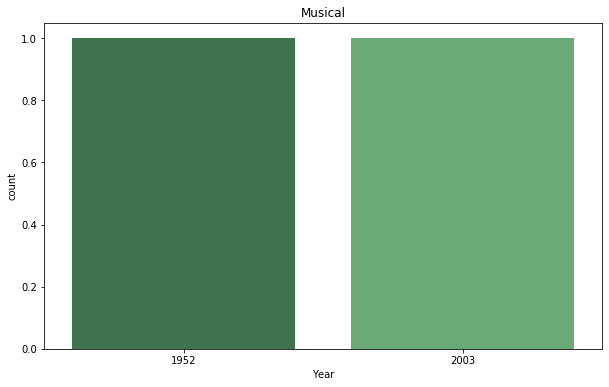

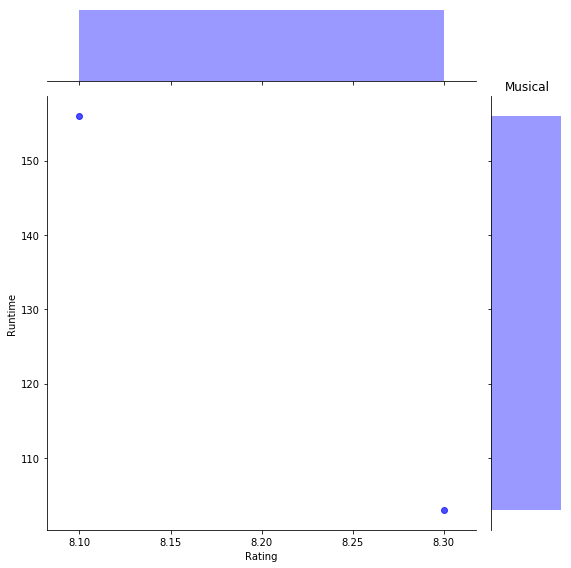

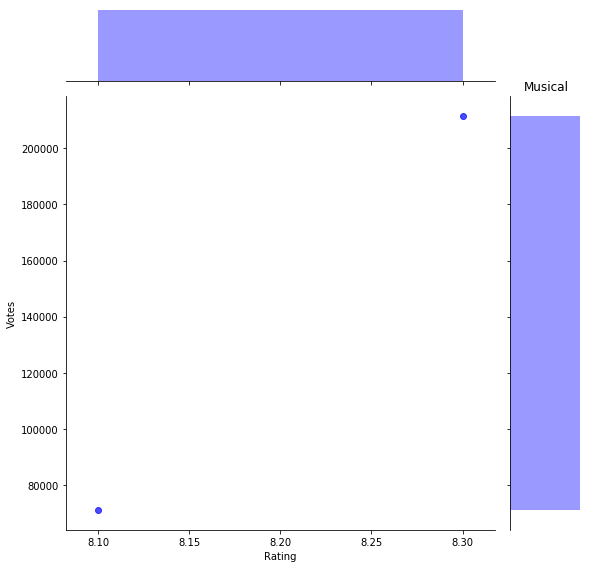

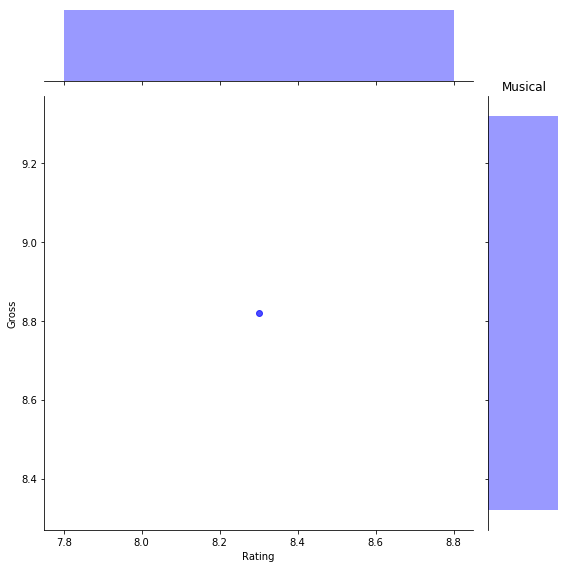

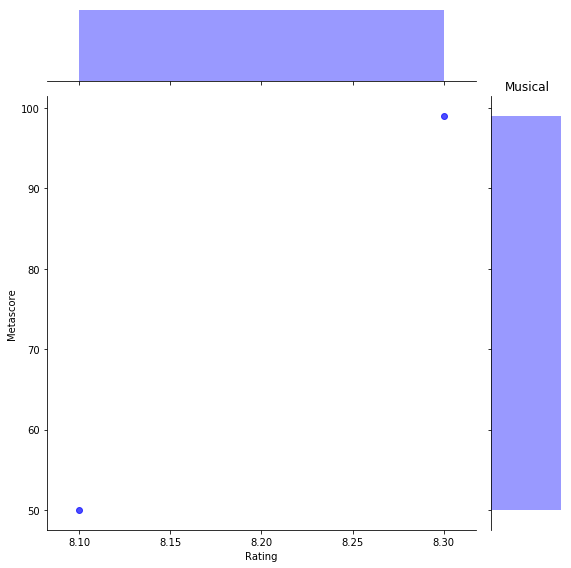

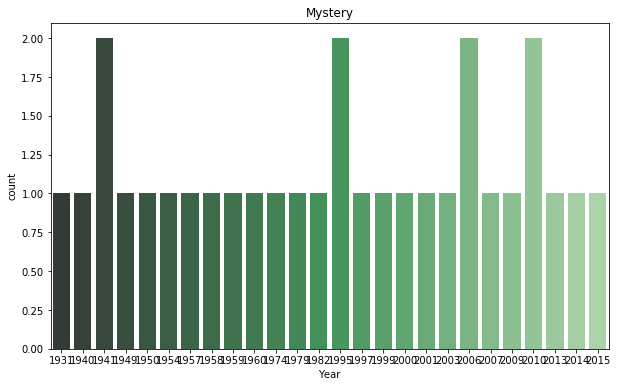

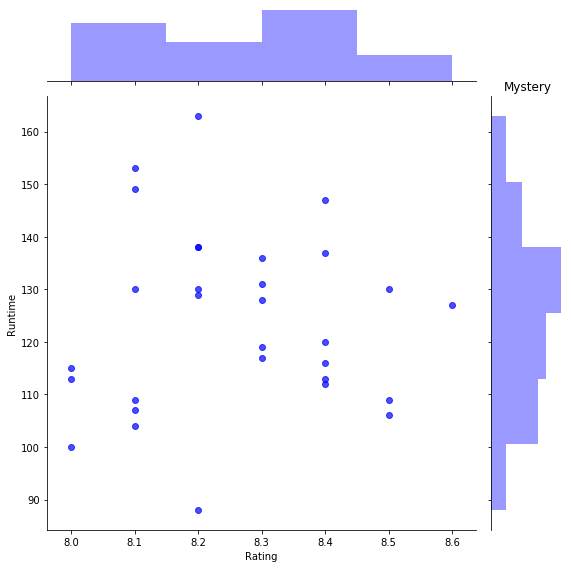

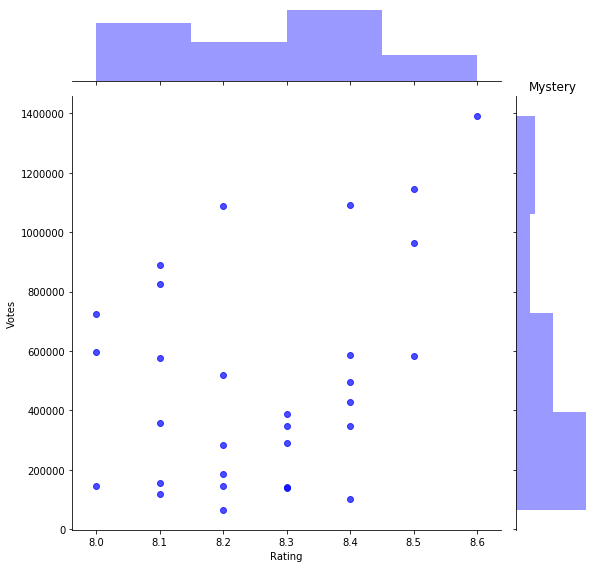

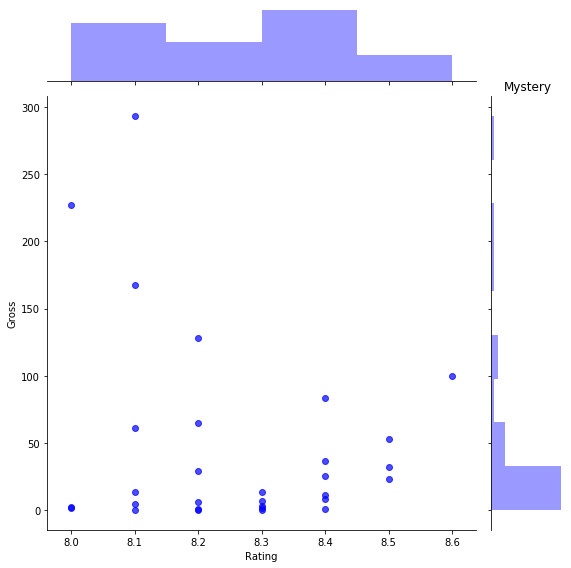

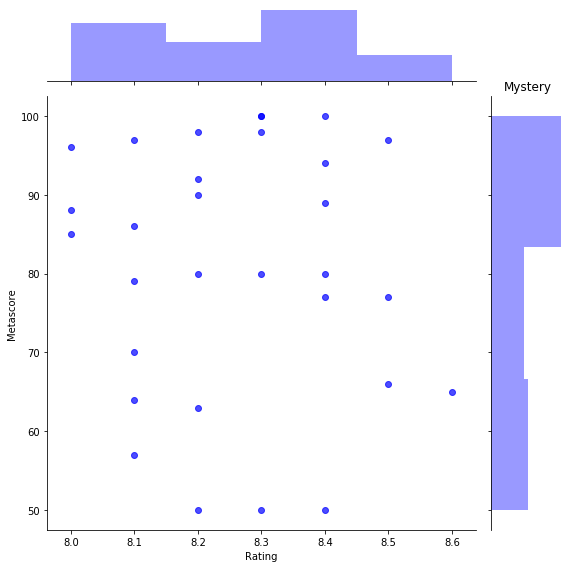

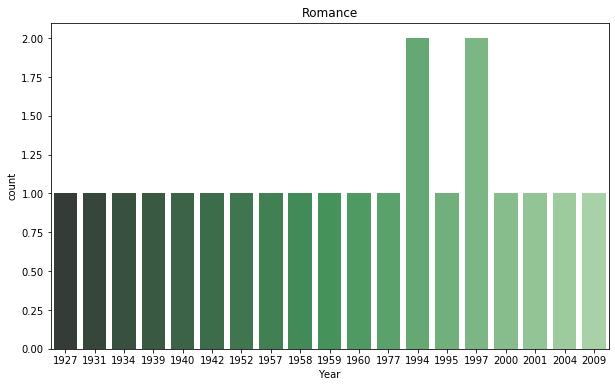

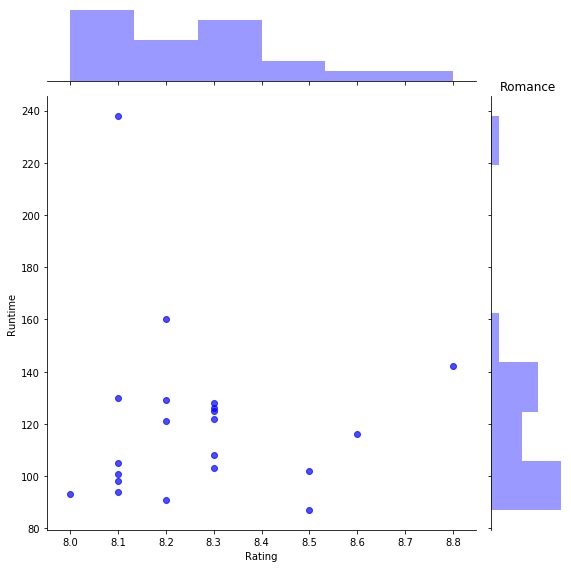

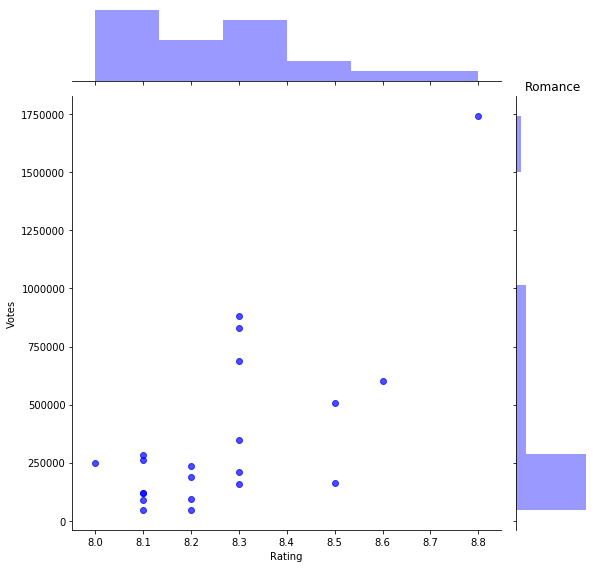

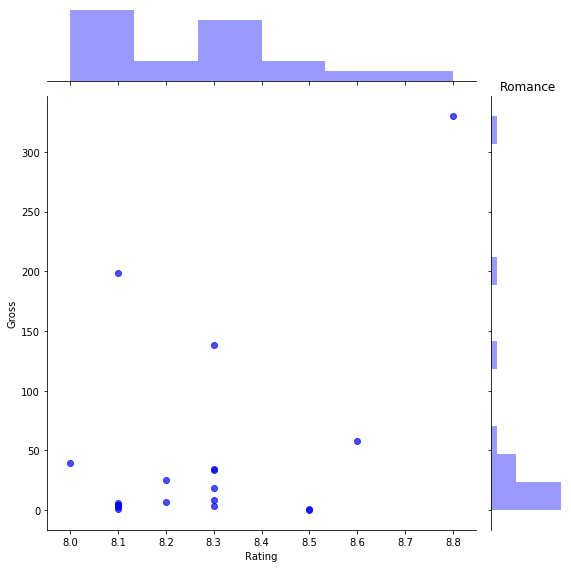

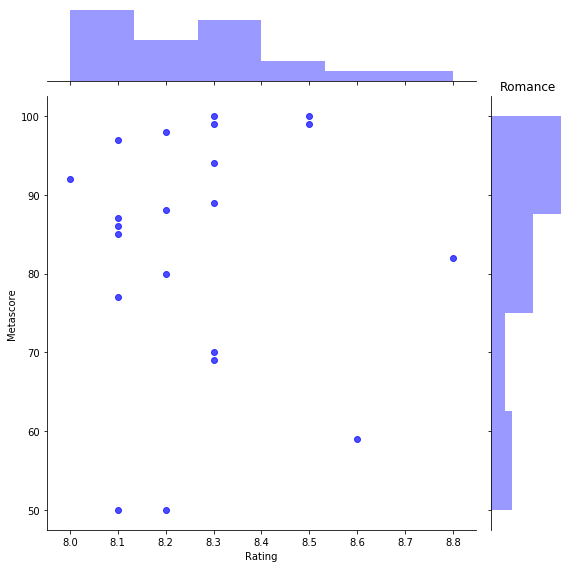

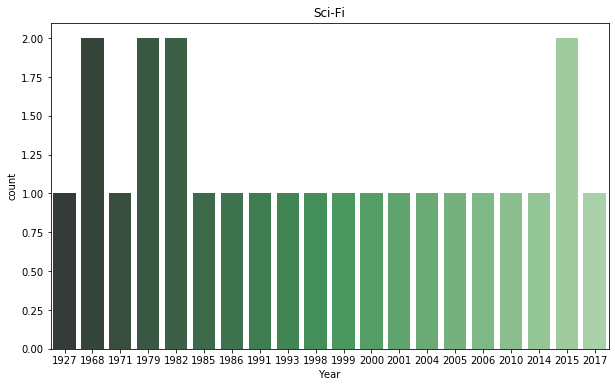

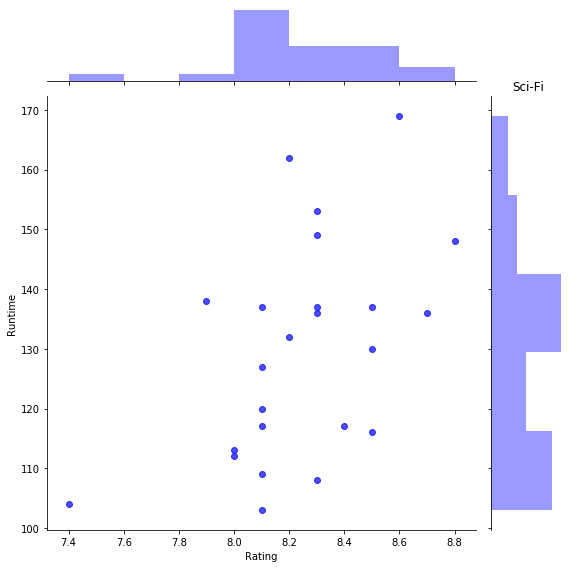

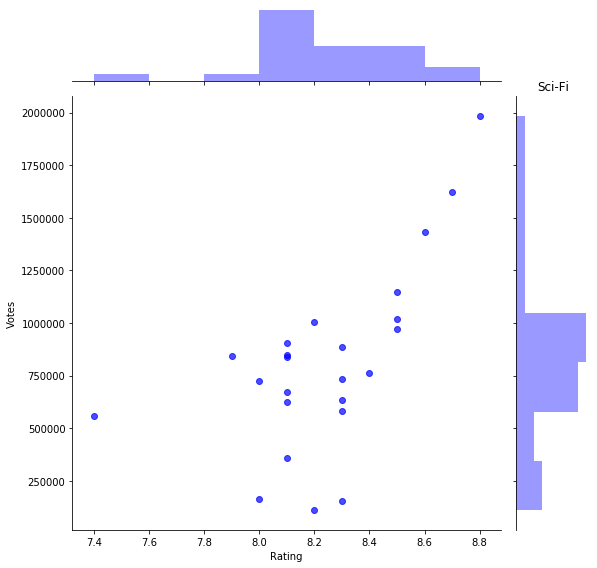

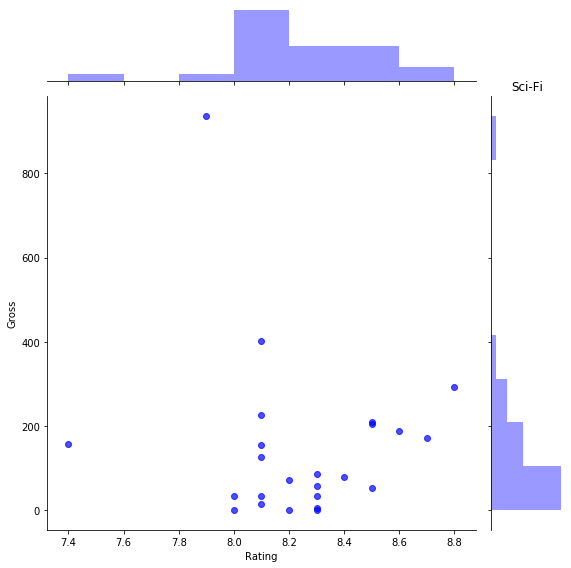

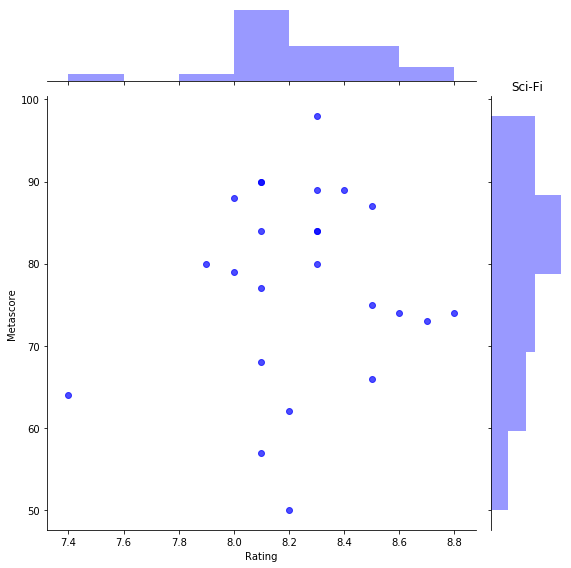

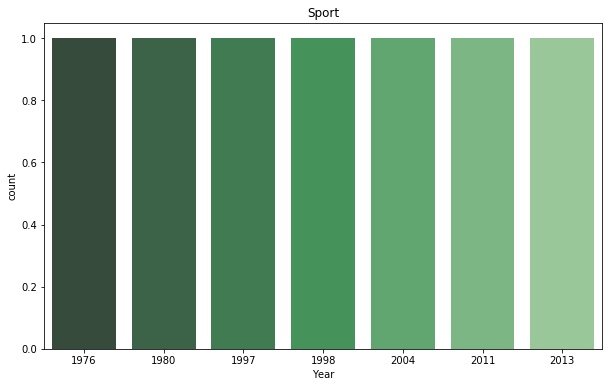

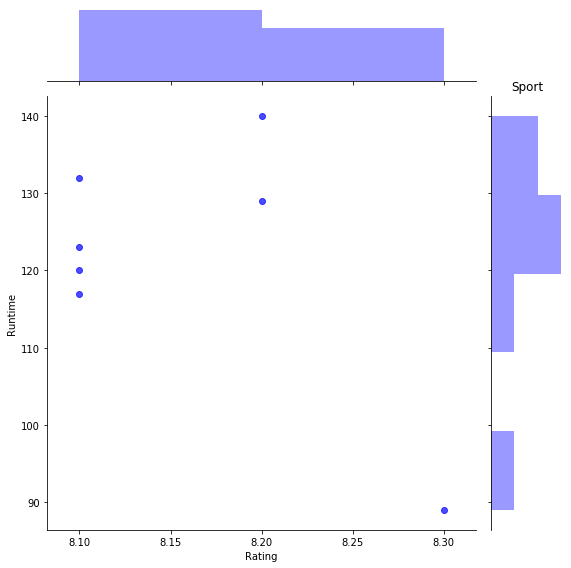

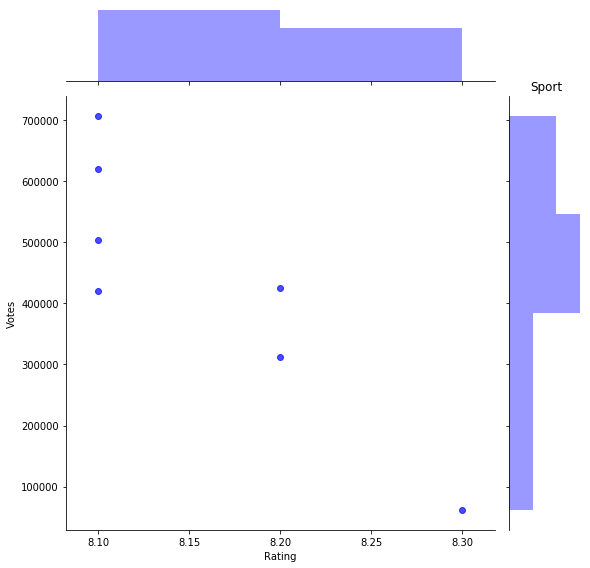

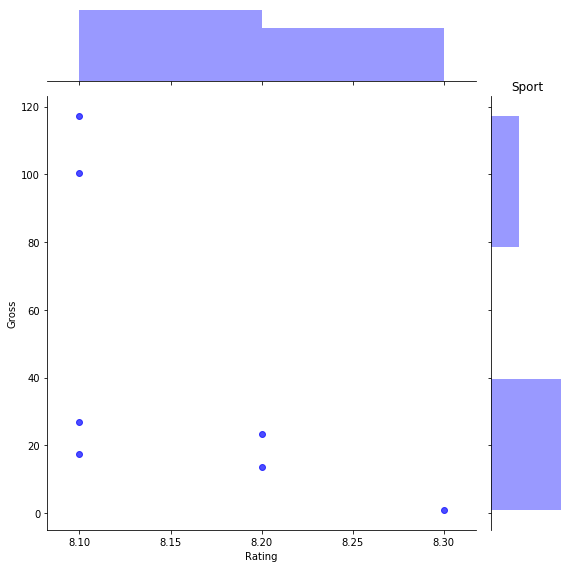

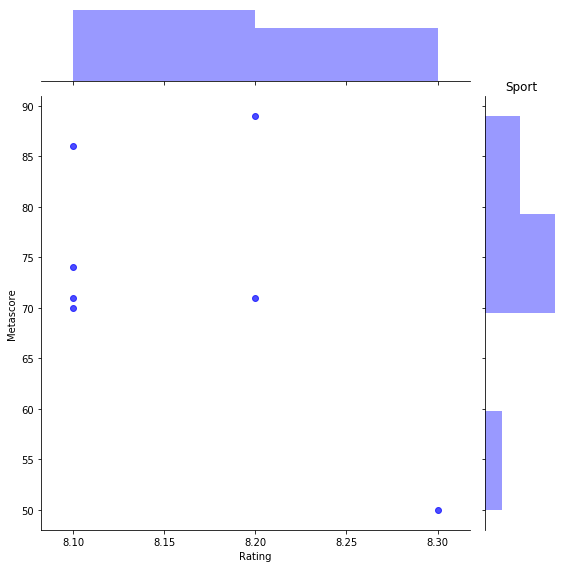

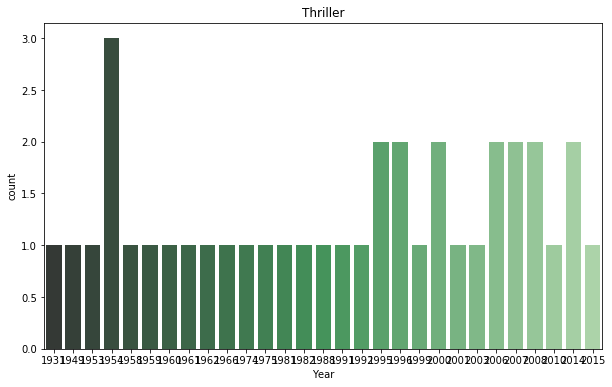

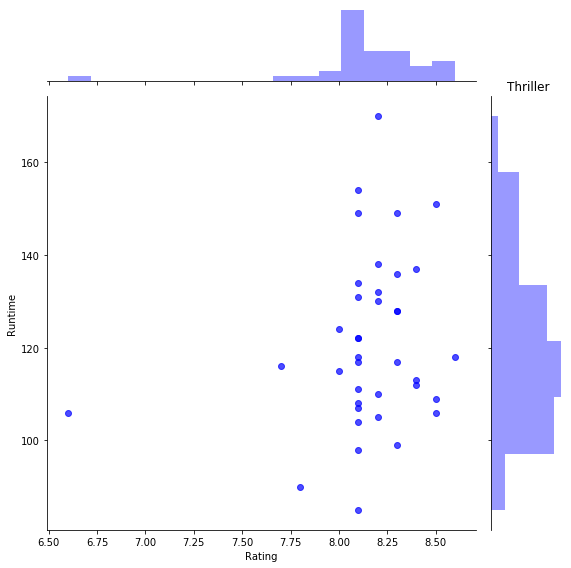

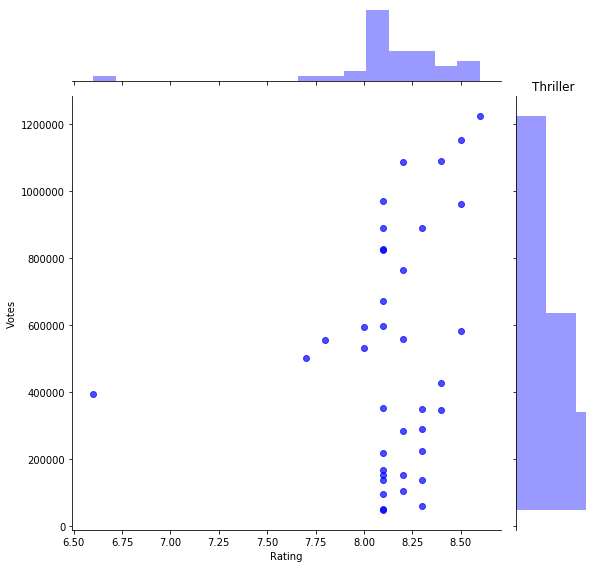

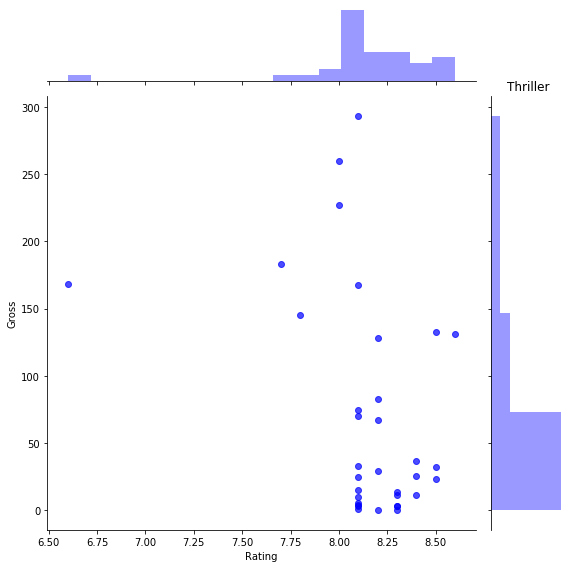

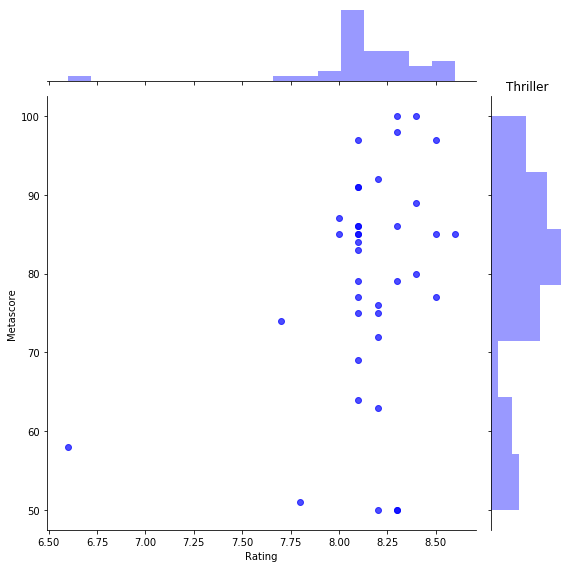

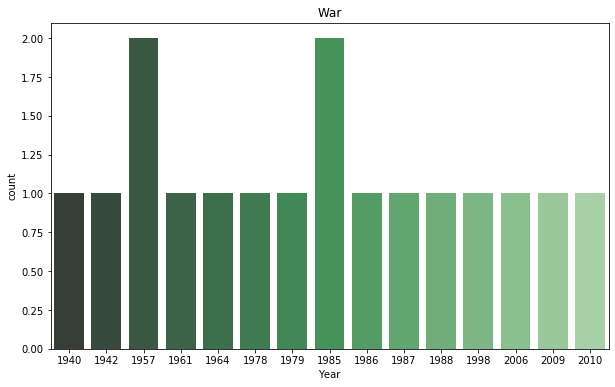

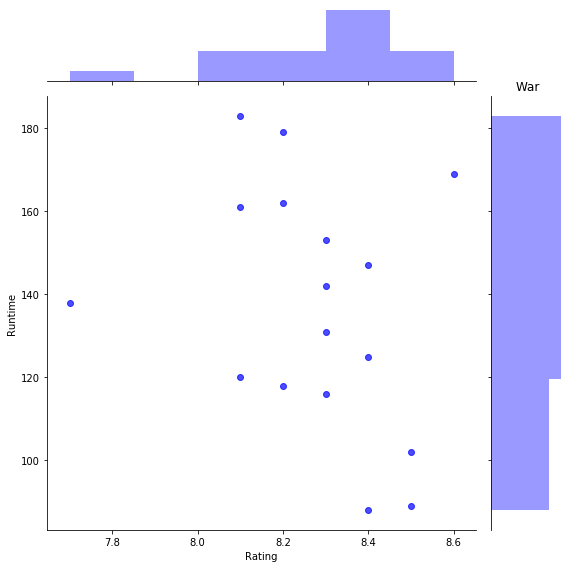

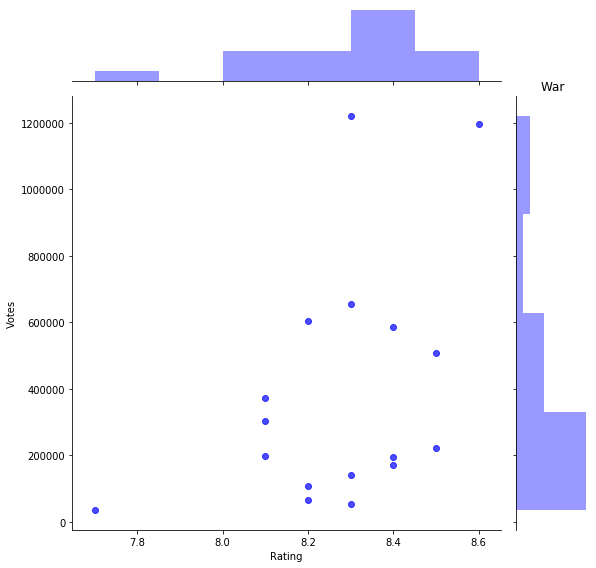

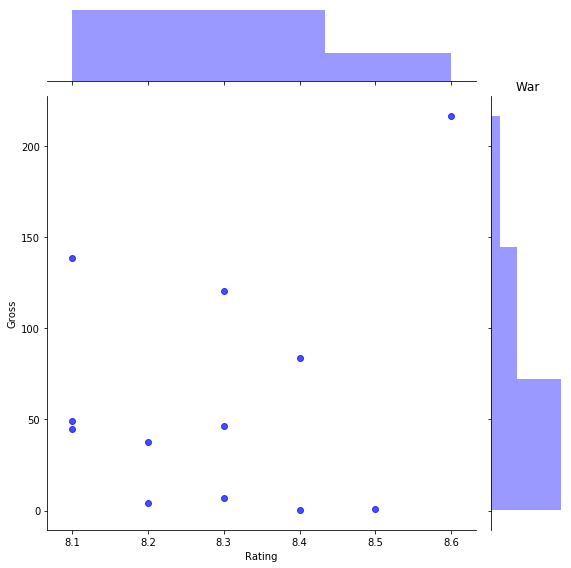

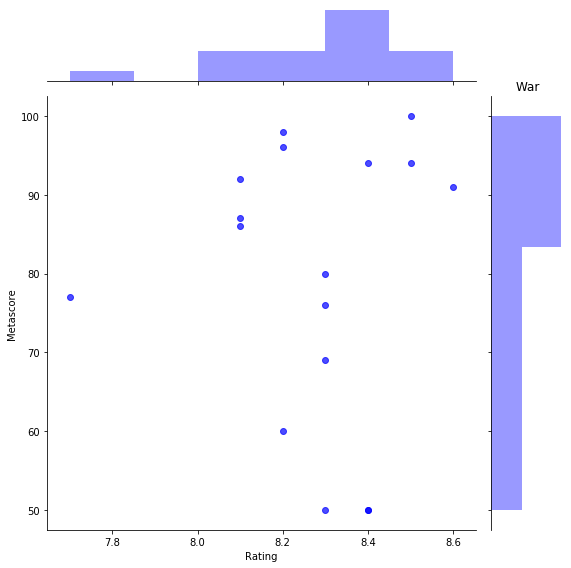

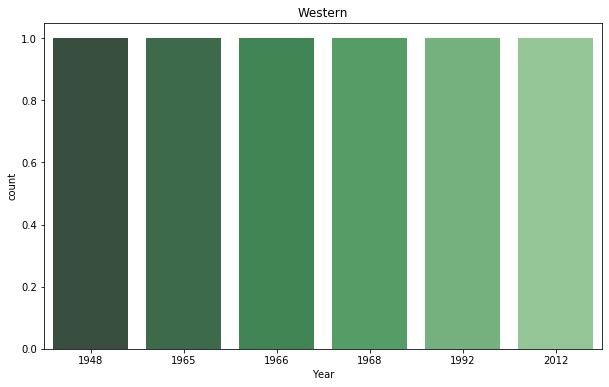

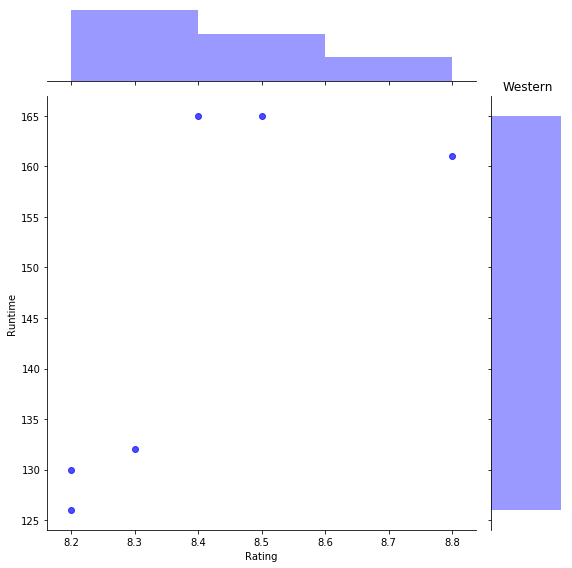

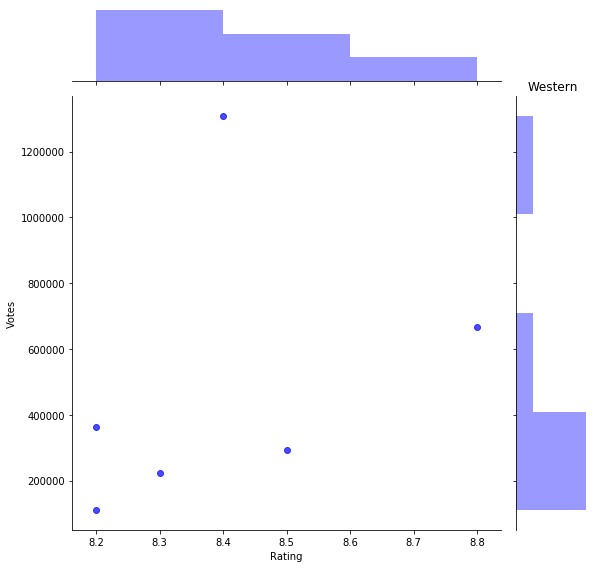

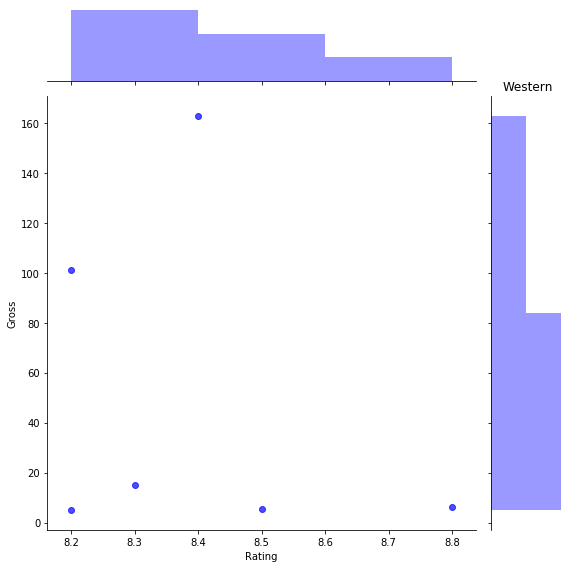

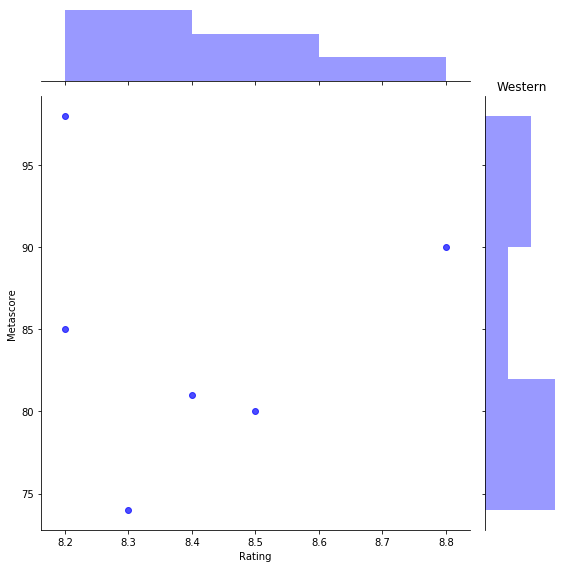

In [6]:
# Bütün film kategorilerini tek tek tanımladım.
# film türü adında bir değişkenin bu kategorilerin hepsinde gezmesi için for döngüsü oluşturdum.
seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'
for genre in seperate_genre:
    df = imdbdata['Genre'].str.contains(genre).fillna(False) # df adında veri tabanına film türlerini aktardım.
    print(genre,'kategorisi ile çekilen toplam film sayısı =',len(imdbdata[df])) # Film türlerinden kaç film olduğunu yazdırdım.
    f, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='Year', data=imdbdata[df], palette="Greens_d"); # Hangi film türünden kaç film olduğunun sütun grafiğinin çizimi.
    plt.title(genre)
    compare_movies_rating = ['Runtime', 'Votes','Gross', 'Metascore'] # Filmlerin Imdb rating'e göre uzunluğunun, oy sayısının, cirosunun ve metascore puanının dağılım grafiğini her biri için ayrı ayrı çizimi.
    for compare in compare_movies_rating:
        sns.jointplot(x='Rating', y=compare, data=imdbdata[df], alpha=0.7, color='b', size=8)
        plt.title(genre)

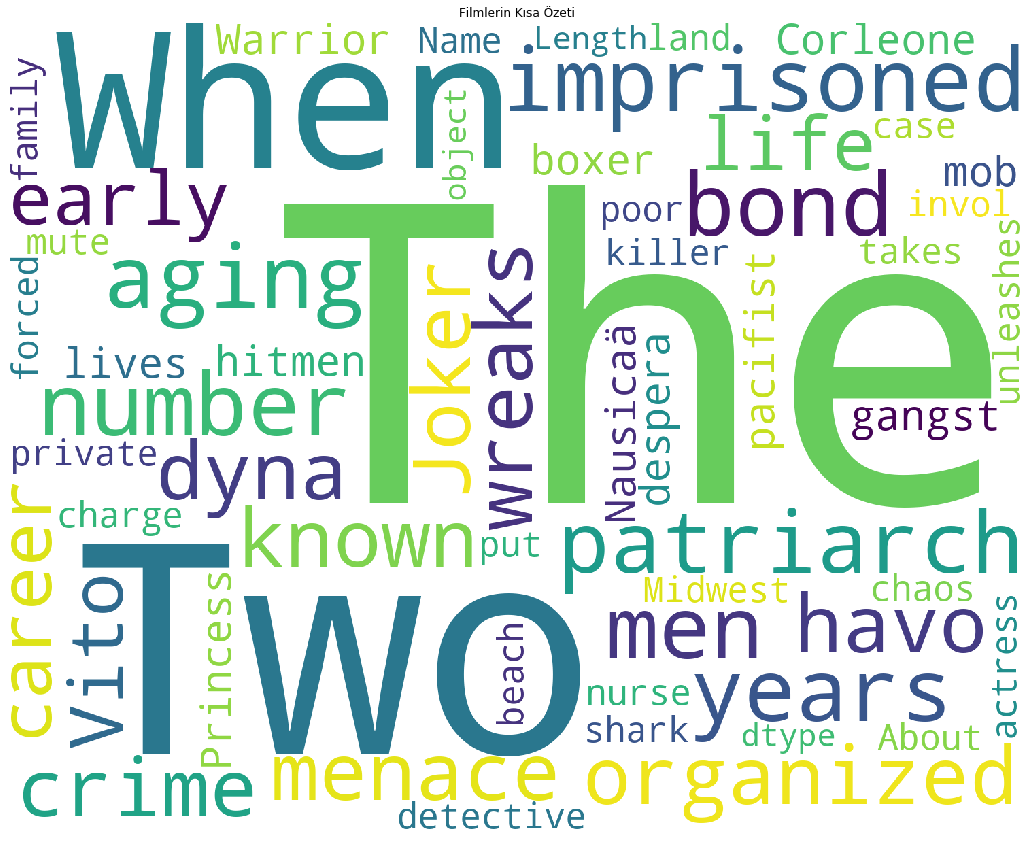

In [7]:
# Filmlerin özet kısmında ki metinlerden alınan kelimelerle yapılan bir görsel
text = (str(imdbdata['About']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Filmlerin Kısa Özeti')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'En iyi 10 Yönetmenin Film Yüzdeleri')

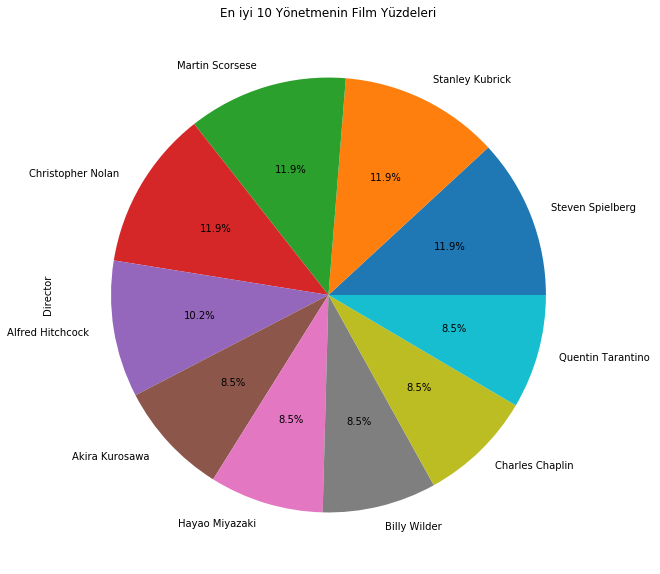

In [8]:
imdbdata.Director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('En iyi 10 Yönetmenin Film Yüzdeleri')

Text(0.5, 1.0, 'Filmlerde ki En İyi 10 Oyuncu Grubu')

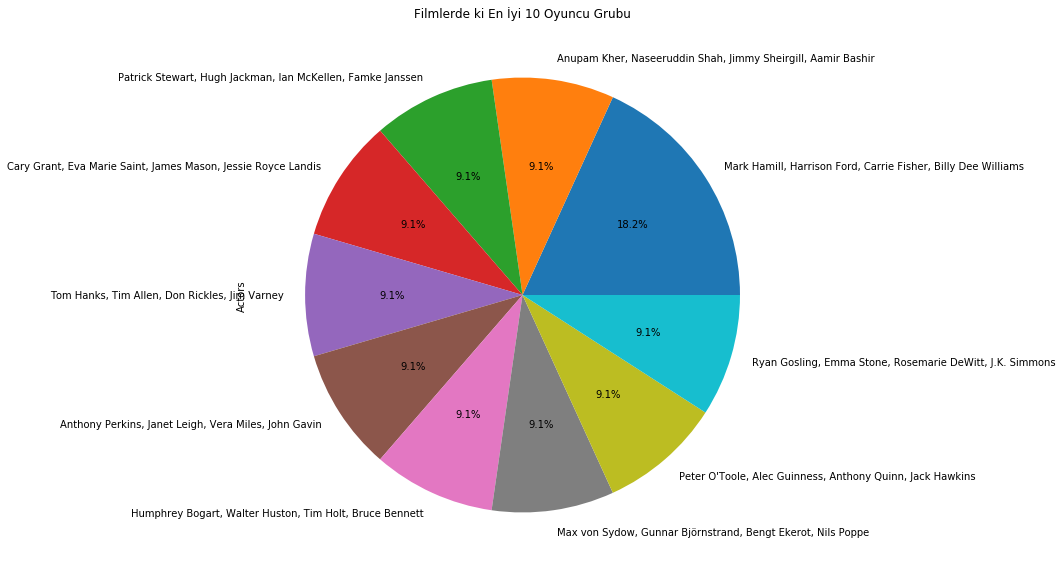

In [9]:
imdbdata.Actors.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Filmlerde ki En İyi 10 Oyuncu Grubu')

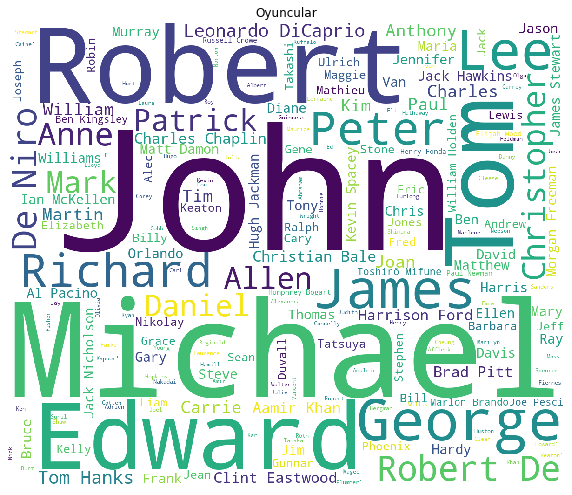

In [10]:
# Oyuncu isimlerinin görselliğe dönüştürülmesi
ctors=imdbdata["Actors"]
actors=set(ctors)
from wordcloud import WordCloud, STOPWORDS
plt.subplots(figsize=(10,10))
text = (str(actors))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Oyuncular')
plt.axis('off')
plt.show()

Yıllara Göre Film Puanları


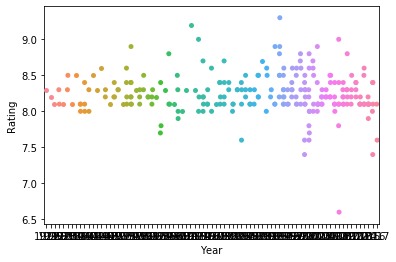

In [11]:
sns.stripplot(x="Year", y="Rating", data=imdbdata, jitter=True);
print('Yıllara Göre Film Puanları')

 Yıllara Göre Filmlere Verilen Oy Sayıları


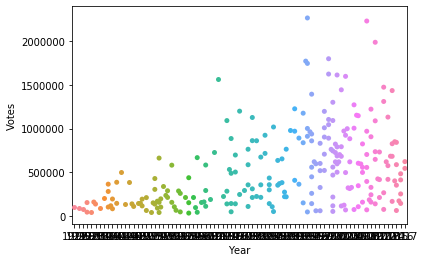

In [12]:
sns.swarmplot(x="Year", y="Votes", data=imdbdata);
print(' Yıllara Göre Filmlere Verilen Oy Sayıları')

Yıllara Göre Yapılan Ciro


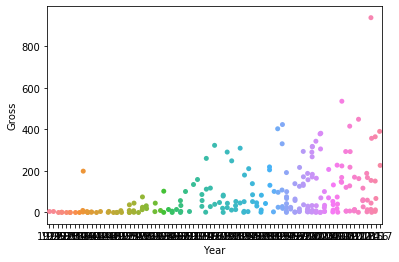

In [13]:
sns.stripplot(x="Year", y="Gross", data=imdbdata, jitter=True);
print('Yıllara Göre Yapılan Ciro')

Yıllara Göre Metascore Puanları


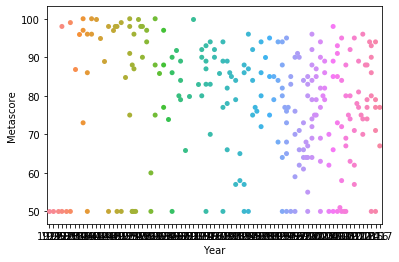

In [14]:
sns.swarmplot(x="Year", y="Metascore", data=imdbdata);
print('Yıllara Göre Metascore Puanları')

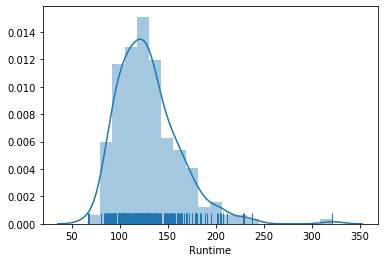

In [15]:
# Filmlerin uzunluğunu gösteren histogram grafiği.
time=imdbdata.Runtime
sns.distplot(time, bins=20, rug=True);

In [16]:
# Diğerlerine göre düşük puanlı filmler.
lowratedmovies= imdbdata.query('(Rating > 0) & (Rating < 7.5)')
lowratedmovies.head()

,Unnamed: 0,Rank,Title,Year,Runtime,Genre,Rating,About,Director,Actors,Votes,Gross,Metascore
66,66,67,Quantum of Solace,2008,106,"Action, Adventure, Thriller",6.6,James Bond descends into mystery as he tries t...,Marc Forster,"Daniel Craig, Olga Kurylenko, Mathieu Amalric,...",395961,168.37,58
73,73,74,X-Men,2000,104,"Action, Adventure, Sci-Fi",7.4,In a world where mutants (evolved super-powere...,Bryan Singer,"Patrick Stewart, Hugh Jackman, Ian McKellen, F...",559633,157.30,64
125,125,126,The Jungle Book,2016,106,"Adventure, Drama, Family",7.4,After a threat from the tiger Shere Khan force...,Jon Favreau,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",253745,364.00,77


In [17]:
print('Düşük puanlı filmlerin sayısı :')
len(lowratedmovies)

Düşük puanlı filmlerin sayısı :


3

In [18]:
# Orta Puanlı Filmler
mediumratedmovies= imdbdata.query('(Rating > 7.5) & (Rating < 8.5)')
mediumratedmovies.head()

,Unnamed: 0,Rank,Title,Year,Runtime,Genre,Rating,About,Director,Actors,Votes,Gross,Metascore
13,13,14,Dangal,2016,161,"Action, Biography, Drama",8.4,Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",144995,12.39,50
23,23,24,Kimi no na wa.,2016,106,"Animation, Drama, Fantasy",8.4,Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",173945,5.02,79
35,35,36,Babam ve Oglum,2005,108,"Drama, Family",8.3,The family of a left-wing journalist is torn a...,Çagan Irmak,"Çetin Tekindor, Fikret Kuskan, Hümeyra, Ege Ta...",75432,NaN,50
36,36,37,Alien,1979,117,"Horror, Sci-Fi",8.4,After a space merchant vessel receives an unkn...,Ridley Scott,"Sigourney Weaver, Tom Skerritt, John Hurt, Ver...",763605,78.90,89
39,39,40,The Dark Knight Rises,2012,164,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...",1471656,448.14,78


In [19]:
print('Orta Puanlı Filmlerin Sayısı:')
len(mediumratedmovies)

Orta Puanlı Filmlerin Sayısı:


199

Text(0.5, 1, '(Orta Puanlı Filmlerin Metascore-Rating Dağılım Grafiği)')

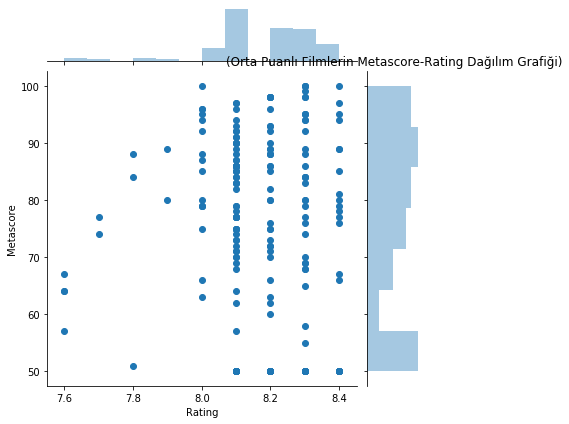

In [26]:
sns.jointplot(x="Rating", y="Metascore", data=mediumratedmovies);
plt.title('(Orta Puanlı Filmlerin Metascore-Rating Dağılım Grafiği)')

Text(0.5, 1, '(Orta Puanlı Filmlerin Votes-Rating Dağılım Grafiği')

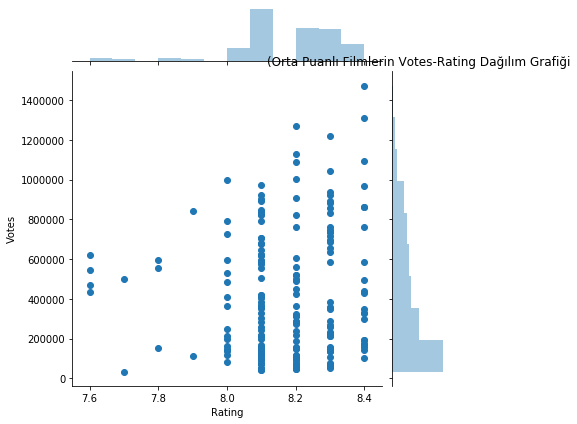

In [21]:
sns.jointplot(x="Rating", y="Votes", data=mediumratedmovies);
plt.title('(Orta Puanlı Filmlerin Votes-Rating Dağılım Grafiği')

Text(0.5, 1, '(Orta Puanlı Filmlerin Gross-Rating Dağılım Grafiği')

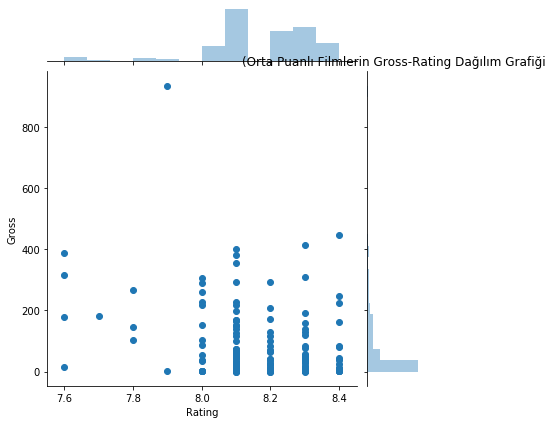

In [22]:
sns.jointplot(x="Rating", y="Gross", data=mediumratedmovies);
plt.title('(Orta Puanlı Filmlerin Gross-Rating Dağılım Grafiği')

In [23]:
# Yüksek Puanlı Filmler
highratedmovies= imdbdata.query('(Rating > 8.5) & (Rating < 10.0)')
highratedmovies.head()

,Unnamed: 0,Rank,Title,Year,Runtime,Genre,Rating,About,Director,Actors,Votes,Gross,Metascore
0,0,1,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2261592,28.34,80
1,1,2,The Godfather,1972,175,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1560378,134.97,100
2,2,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2226619,534.86,84
3,3,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1090504,57.30,90
4,4,5,Pulp Fiction,1994,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1769128,107.93,94


In [25]:
print('Yüksek Puanlı Filmlerin Sayısı :')
len(highratedmovies)

Yüksek Puanlı Filmlerin Sayısı :


29

Text(0.5, 1, '(Yüksek Puanlı Filmlerin Metascore-Rating Dağılım Grafiği)')

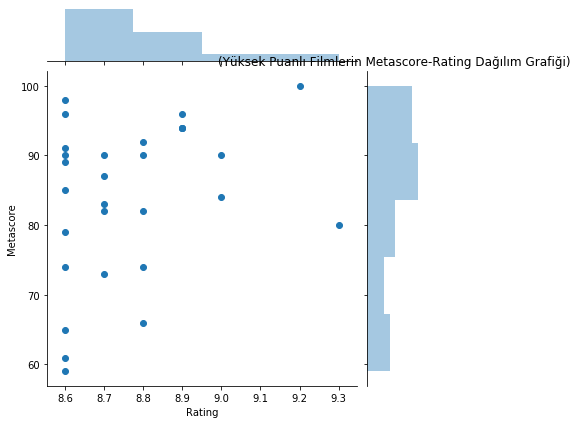

In [27]:
sns.jointplot(x="Rating", y="Metascore", data=highratedmovies);
plt.title('(Yüksek Puanlı Filmlerin Metascore-Rating Dağılım Grafiği)')

Text(0.5, 1, '(Yüksek Puanlı Filmlerin Votes-Rating Dağılım Grafiği)')

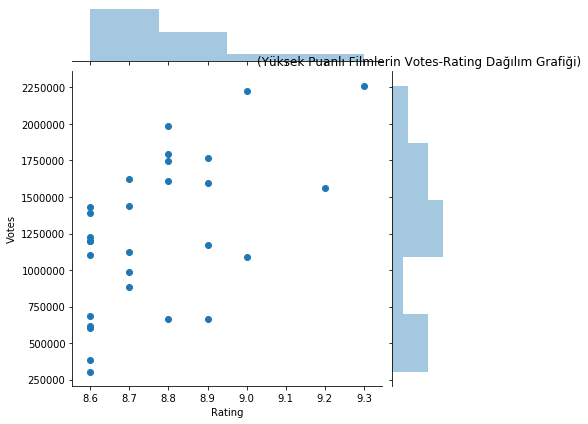

In [28]:
sns.jointplot(x="Rating", y="Votes", data=highratedmovies);
plt.title('(Yüksek Puanlı Filmlerin Votes-Rating Dağılım Grafiği)')

Text(0.5, 1, '((Yüksek Puanlı Filmlerin Gross-Rating Dağılım Grafiği)')

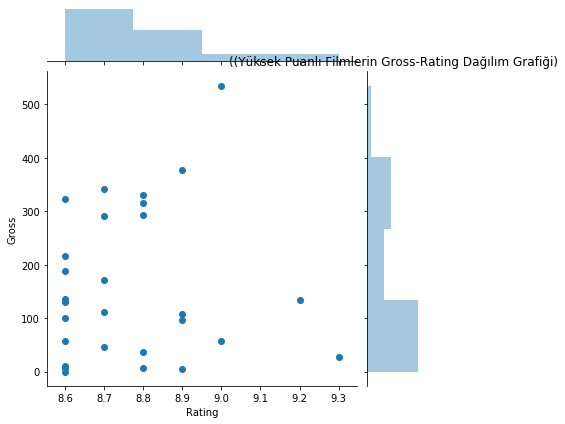

In [29]:
sns.jointplot(x="Rating", y="Gross", data=highratedmovies);
plt.title('((Yüksek Puanlı Filmlerin Gross-Rating Dağılım Grafiği)')

In [32]:
# Filmleri Verilen Oy Sayılarına göre sıralanması.
sortedVotes= imdbdata.sort_values(['Votes'], ascending=False)
sortedVotes

,Unnamed: 0,Rank,Title,Year,Runtime,Genre,Rating,About,Director,Actors,Votes,Gross,Metascore
0,0,1,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2261592,28.34,80
2,2,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2226619,534.86,84
10,10,11,Inception,2010,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",1984177,292.58,74
12,12,13,Fight Club,1999,139,Drama,8.8,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",1796203,37.03,66
4,4,5,Pulp Fiction,1994,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",1769128,107.93,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,158,159,Sunrise: A Song of Two Humans,1927,94,"Drama, Romance",8.1,An allegorical tale about a man fighting the g...,F.W. Murnau,"George O'Brien, Janet Gaynor, Margaret Livings...",45785,0.54,50
159,159,160,La passion de Jeanne d'Arc,1928,110,"Biography, Drama, History",8.1,"In 1431, Jeanne d'Arc is placed on trial on ch...",Carl Theodor Dreyer,"Maria Falconetti, Eugene Silvain, André Berley...",45297,0.02,50
151,151,152,Andrei Rublev,1966,205,"Biography, Drama, History",8.1,"The life, times and afflictions of the fifteen...",Andrei Tarkovsky,"Anatoliy Solonitsyn, Ivan Lapikov, Nikolay Gri...",44232,0.10,50
200,200,201,Le notti di Cabiria,1957,110,Drama,8.1,A waifish prostitute wanders the streets of Ro...,Federico Fellini,"Giulietta Masina, François Périer, Franca Marz...",41572,0.75,50


In [33]:
v= sortedVotes.query('(Votes > 1500000)')
print('1.5 Milyondan Fazla Oy Verilen Filmlerin Sayısı :')
len(v)

1.5 Milyondan Fazla Oy Verilen Filmlerin Sayısı :


10

In [34]:
print('1.5 Milyondan Fazla Oy Verilen Filmler :')
sortedVotes["Title"].head(10)

1.5 Milyondan Fazla Oy Verilen Filmler :


0                              The Shawshank Redemption
2                                       The Dark Knight
10                                            Inception
12                                           Fight Club
4                                          Pulp Fiction
9                                          Forrest Gump
16                                           The Matrix
11    The Lord of the Rings: The Fellowship of the Ring
6         The Lord of the Rings: The Return of the King
1                                         The Godfather
Name: Title, dtype: object

In [35]:
print('1.5 Milyondan Fazla Oy Verilen Filmlerin Rating`leri:')
Sortedvotes["Rating"].head(10)

1.5 Milyondan Fazla Oy Verilen Filmlerin Rating`leri:


0     9.3
2     9.0
10    8.8
12    8.8
4     8.9
9     8.8
16    8.7
11    8.8
6     8.9
1     9.2
Name: Rating, dtype: float64

In [36]:
print('1.5 Milyondan Fazla Oy Verilen Filmlerin Ciroları :')
Sortedvotes["Gross"].head(10)

1.5 Milyondan Fazla Oy Verilen Filmlerin Ciroları :


0      28.34
2     534.86
10    292.58
12     37.03
4     107.93
9     330.25
16    171.48
11    315.54
6     377.85
1     134.97
Name: Gross, dtype: float64

In [37]:
print('1.5 Milyondan Fazla Oy Verilen Filmlerin Metascore Puanları :')
Sortedvotes["Metascore"].head(10)

1.5 Milyondan Fazla Oy Verilen Filmlerin Metascore Puanları :


0      80
2      84
10     74
12     66
4      94
9      82
16     73
11     92
6      94
1     100
Name: Metascore, dtype: int64

In [38]:
# Filmleri Cirolarına göre sıralanması. 
sortedGross= imdbdata.sort_values(['Gross'], ascending=False)
# En çok ciro yapan 5 film
sortedGross.head()

,Unnamed: 0,Rank,Title,Year,Runtime,Genre,Rating,About,Director,Actors,Votes,Gross,Metascore
202,202,203,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",841807,936.66,80
2,2,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2226619,534.86,84
39,39,40,The Dark Knight Rises,2012,164,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...",1471656,448.14,78
126,126,127,The Lion King,1994,88,"Animation, Adventure, Drama",8.5,Lion prince Simba and his father are targeted ...,"Roger Allers, Rob Minkoff","Matthew Broderick, Jeremy Irons, James Earl Jo...",911184,422.78,88
136,136,137,Toy Story 3,2010,103,"Animation, Adventure, Comedy",8.3,The toys are mistakenly delivered to a day-car...,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty",735628,415.00,92


In [40]:
m = sortedGross.query('(Gross > 500)')
print('Yarım Milyondan Fazla Ciro Yapan Film Sayısı :')
len(m)

Yarım Milyondan Fazla Ciro Yapan Film Sayısı :


2

In [41]:
n= sortedGross.query('(Gross < 500)')
print('Yarım Milyondan Az Ciro Yapan Film Sayısı :')
len(n)

Yarım Milyondan Az Ciro Yapan Film Sayısı :


222

In [42]:
# Yarım Milyondan Fazla Ciro Yapan Filmler :
m.head()

,Unnamed: 0,Rank,Title,Year,Runtime,Genre,Rating,About,Director,Actors,Votes,Gross,Metascore
202,202,203,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",841807,936.66,80
2,2,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2226619,534.86,84


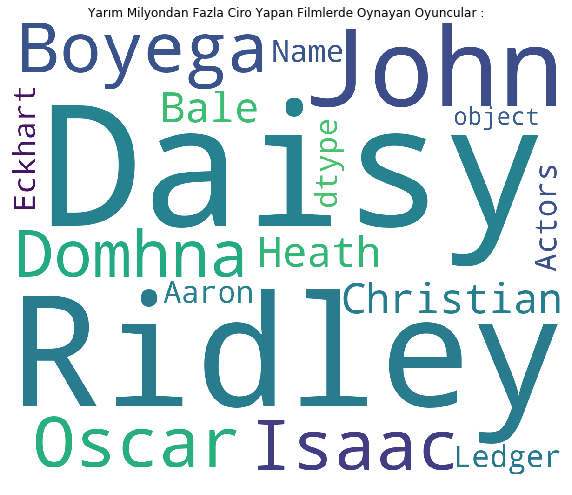

In [43]:
from wordcloud import WordCloud, STOPWORDS
plt.subplots(figsize=(10,10))
text = (str(m['Actors']))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Yarım Milyondan Fazla Ciro Yapan Filmlerde Oynayan Oyuncular :')
plt.axis('off')
plt.show()

In [44]:
# Metascore puanlarına göre film sayıları
imdbdata.Metascore.value_counts()

50     34
80     10
77     10
86      9
94      9
90      9
88      9
85      9
75      8
79      8
98      8
89      8
96      7
84      7
100     7
92      6
87      5
95      5
83      5
64      5
66      5
74      5
70      4
73      4
97      4
82      4
91      3
57      3
62      3
67      3
68      3
76      3
93      3
71      3
72      3
69      3
65      2
99      2
63      2
58      2
78      2
81      1
61      1
60      1
59      1
55      1
51      1
Name: Metascore, dtype: int64

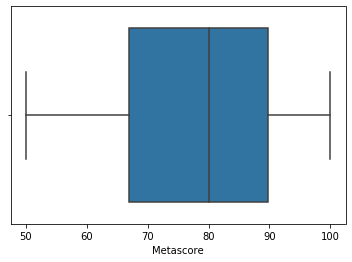

In [45]:
# Filmlerin Metascore Puanlarına göre bir kutu grafiği.
metascore=imdbdata.Metascore
sns.boxplot(metascore);

C:\Users\Celil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


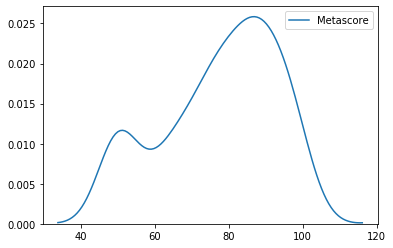

In [46]:
# Filmlerin Metascore Puanlarına göre bir çekirdek yoğunluk tahmini grafiği.
sns.kdeplot(metascore);